# Test SI without DA

In [1]:
from dataset.matDataset import SI_dataset
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
import torch

from models import *
from trial import *


model = AttentionNet(
    input_size = (22, 562),
    activate_func = nn.ELU,
    dropout = 0.9,
    kernel_size = 25,
    dense_size = 128,
    filter_number = 32
)


optimizer = optim.Adam(
    model.parameters(),
    lr = 0.00001,
    weight_decay = 0.1
)
 
train_dataset = SI_dataset()
test_dataset = SI_dataset(train = False)

train_loader = DataLoader(train_dataset, batch_size = 128)


device = torch.device('cuda:0')

model, loss_log, accuracy_log = train(model, device, nn.CrossEntropyLoss(), optimizer, 400, train_loader, test_dataset)



Training Epoch 01/400:   0%|          | 0/36 [00:00<?, ?batch/s]

Sequential(
  (0): Linear(in_features=34496, out_features=128, bias=True)
  (1): ELU(alpha=1.0)
)


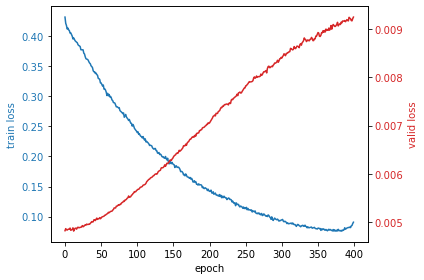

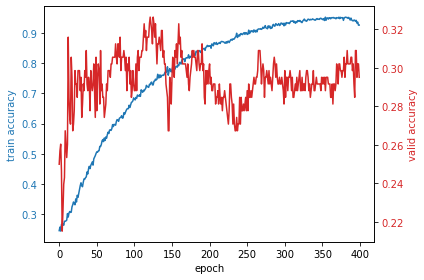

tensor([3, 1, 3, 3, 3, 2, 1, 3, 3, 1, 1, 1, 1, 0, 1, 0, 1, 3, 1, 0, 1, 2, 3, 1,
        1, 1, 2, 2, 3, 3, 0, 0, 3, 3, 2, 0, 2, 1, 0, 2, 3, 0, 2, 0, 0, 1, 3, 3,
        3, 2, 3, 0, 2, 1, 3, 0, 0, 2, 3, 2, 2, 3, 0, 2, 2, 3, 2, 0, 2, 2, 0, 3,
        0, 1, 1, 0, 1, 2, 1, 2, 2, 0, 2, 3, 3, 2, 1, 2, 0, 2, 3, 3, 2, 3, 2, 0,
        1, 3, 2, 1, 2, 1, 0, 3, 0, 3, 2, 3, 2, 3, 3, 1, 1, 0, 3, 3, 3, 1, 1, 1,
        2, 0, 3, 0, 0, 2, 1, 0, 2, 0, 1, 0, 3, 1, 3, 2, 3, 1, 2, 2, 0, 2, 1, 3,
        2, 2, 1, 1, 3, 2, 0, 2, 0, 2, 3, 2, 2, 2, 3, 1, 1, 3, 1, 2, 0, 1, 2, 1,
        2, 0, 0, 1, 2, 1, 0, 2, 3, 1, 1, 3, 0, 2, 1, 1, 0, 0, 2, 0, 2, 1, 1, 0,
        1, 3, 0, 2, 1, 1, 3, 3, 0, 3, 1, 2, 0, 1, 0, 0, 3, 2, 1, 3, 1, 0, 0, 2,
        1, 0, 1, 0, 2, 0, 1, 0, 0, 3, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 3, 0, 0, 2,
        1, 0, 0, 1, 3, 1, 3, 1, 2, 2, 2, 2, 3, 2, 3, 2, 1, 2, 0, 0, 0, 2, 1, 0,
        1, 1, 0, 3, 0, 2, 3, 1, 3, 3, 1, 3, 3, 1, 2, 1, 0, 2, 3, 2, 2, 1, 1, 3],
       device='cuda:0')


In [4]:
from importlib import reload
import utils
print(model.FC1)
reload(utils)
utils.plot_curve(loss_log, 'loss')
utils.plot_curve(accuracy_log, 'accuracy')
print(torch.argmax(model(test_dataset.data.to(device)), dim = 1))

# Test SI with DA

In [3]:
from dataset.matDataset import SI_dataset
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
import torch

from models import *
from trial import *


model = AttentionNet(
    input_size = (22, 125),
    activate_func = nn.ELU,
    dropout = 0.9,
    kernel_size = 12,
    dense_size = 91,
    filter_number = 32
)


optimizer = optim.SGD(
    model.parameters(),
    lr = 0.1,
    weight_decay = 0.1
)

train_dataset = SI_dataset(DA = True)
test_dataset = SI_dataset(train = False, DA = True)

train_loader = DataLoader(train_dataset, batch_size = 128)


device = torch.device('cuda:0')

model, loss_log, accuracy_log = train(model, device, nn.CrossEntropyLoss(), optimizer, 100, train_loader, test_dataset)



Training Epoch 01/100: 100%|██████████| 1332/1332 [00:46<00:00, 28.43batch/s, accuracy=25, loss=0.0108]  


current loss: 0.00013009540445811754, current accuracy: 0.25


Training Epoch 02/100: 100%|██████████| 1332/1332 [00:44<00:00, 30.11batch/s, accuracy=25.8, loss=0.0108]


current loss: 0.0001300953932710596, current accuracy: 0.25


Training Epoch 03/100: 100%|██████████| 1332/1332 [00:44<00:00, 30.20batch/s, accuracy=25.8, loss=0.0108]


current loss: 0.00013009500172403123, current accuracy: 0.25


Training Epoch 04/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.33batch/s, accuracy=25.8, loss=0.0108]


current loss: 0.0001300950800334369, current accuracy: 0.25


Training Epoch 05/100: 100%|██████████| 1332/1332 [00:44<00:00, 30.05batch/s, accuracy=25.8, loss=0.0108]


current loss: 0.0001300953932710596, current accuracy: 0.25


Training Epoch 06/100: 100%|██████████| 1332/1332 [00:44<00:00, 30.03batch/s, accuracy=26.6, loss=0.0108]


current loss: 0.0001300950800334369, current accuracy: 0.25


Training Epoch 07/100: 100%|██████████| 1332/1332 [00:44<00:00, 30.09batch/s, accuracy=29.7, loss=0.0108]


current loss: 0.00013009501291108918, current accuracy: 0.25


Training Epoch 08/100: 100%|██████████| 1332/1332 [00:44<00:00, 30.15batch/s, accuracy=24.2, loss=0.0108]


current loss: 0.00013009531496165392, current accuracy: 0.25


Training Epoch 09/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.68batch/s, accuracy=27.3, loss=0.0108]


current loss: 0.00013009511359461076, current accuracy: 0.25


Training Epoch 10/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.37batch/s, accuracy=22.7, loss=0.0108]


current loss: 0.00013009509122049486, current accuracy: 0.25


Training Epoch 11/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.47batch/s, accuracy=29.7, loss=0.0108]


current loss: 0.00013009511359461076, current accuracy: 0.25


Training Epoch 12/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.65batch/s, accuracy=29.7, loss=0.0108]


current loss: 0.00013009501291108918, current accuracy: 0.25


Training Epoch 13/100: 100%|██████████| 1332/1332 [00:44<00:00, 30.23batch/s, accuracy=31.2, loss=0.0108]


current loss: 0.0001300954156451755, current accuracy: 0.25


Training Epoch 14/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.48batch/s, accuracy=20.3, loss=0.0108]


current loss: 0.00013009502409814714, current accuracy: 0.25


Training Epoch 15/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.42batch/s, accuracy=24.2, loss=0.0108]


current loss: 0.00013009501291108918, current accuracy: 0.25


Training Epoch 16/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.40batch/s, accuracy=25.8, loss=0.0108]


current loss: 0.00013009504647226304, current accuracy: 0.25


Training Epoch 17/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.48batch/s, accuracy=24.2, loss=0.0108]


current loss: 0.00013009506884637895, current accuracy: 0.25


Training Epoch 18/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.51batch/s, accuracy=20.3, loss=0.0108]


current loss: 0.0001300954156451755, current accuracy: 0.25


Training Epoch 19/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.52batch/s, accuracy=25, loss=0.0108]  


current loss: 0.00013009523665224825, current accuracy: 0.25


Training Epoch 20/100: 100%|██████████| 1332/1332 [00:44<00:00, 30.26batch/s, accuracy=22.7, loss=0.0108]


current loss: 0.00013009509122049486, current accuracy: 0.25


Training Epoch 21/100: 100%|██████████| 1332/1332 [00:44<00:00, 30.15batch/s, accuracy=20.3, loss=0.0108]


current loss: 0.00013009540445811754, current accuracy: 0.25


Training Epoch 22/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.41batch/s, accuracy=22.7, loss=0.0108]


current loss: 0.0001300954380192914, current accuracy: 0.25


Training Epoch 23/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.30batch/s, accuracy=28.9, loss=0.0108]


current loss: 0.00013009521427813234, current accuracy: 0.25


Training Epoch 24/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.54batch/s, accuracy=25, loss=0.0108]  


current loss: 0.00013009516952990053, current accuracy: 0.25


Training Epoch 25/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.46batch/s, accuracy=30.5, loss=0.0108]


current loss: 0.00013009547158046526, current accuracy: 0.25


Training Epoch 26/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.76batch/s, accuracy=26.6, loss=0.0108]


current loss: 0.00013009500172403123, current accuracy: 0.25


Training Epoch 27/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.49batch/s, accuracy=23.4, loss=0.0108]


current loss: 0.00013009534852282778, current accuracy: 0.25


Training Epoch 28/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.45batch/s, accuracy=31.2, loss=0.0108]


current loss: 0.00013009540445811754, current accuracy: 0.25


Training Epoch 29/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.78batch/s, accuracy=32.8, loss=0.0108]


current loss: 0.00013009512478166872, current accuracy: 0.25


Training Epoch 30/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.40batch/s, accuracy=18, loss=0.0108]  


current loss: 0.00013009533733576983, current accuracy: 0.25


Training Epoch 31/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.79batch/s, accuracy=28.9, loss=0.0108]


current loss: 0.00013009512478166872, current accuracy: 0.25


Training Epoch 32/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.75batch/s, accuracy=29.7, loss=0.0108]


current loss: 0.0001300954380192914, current accuracy: 0.25


Training Epoch 33/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.70batch/s, accuracy=32, loss=0.0108]  


current loss: 0.00013009500172403123, current accuracy: 0.25


Training Epoch 34/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.51batch/s, accuracy=25, loss=0.0108]  


current loss: 0.00013009509122049486, current accuracy: 0.25


Training Epoch 35/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.33batch/s, accuracy=21.9, loss=0.0108]


current loss: 0.0001300954156451755, current accuracy: 0.25


Training Epoch 36/100: 100%|██████████| 1332/1332 [00:44<00:00, 30.26batch/s, accuracy=26.6, loss=0.0108]


current loss: 0.0001300952030910744, current accuracy: 0.25


Training Epoch 37/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.48batch/s, accuracy=28.1, loss=0.0108]


current loss: 0.0001300952030910744, current accuracy: 0.25


Training Epoch 38/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.66batch/s, accuracy=21.9, loss=0.0108]


current loss: 0.00013009519190401643, current accuracy: 0.25


Training Epoch 39/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.59batch/s, accuracy=25, loss=0.0108]  


current loss: 0.0001300954603934073, current accuracy: 0.25


Training Epoch 40/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.40batch/s, accuracy=20.3, loss=0.0108]


current loss: 0.00013009511359461076, current accuracy: 0.25


Training Epoch 41/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.52batch/s, accuracy=26.6, loss=0.0108]


current loss: 0.00013009511359461076, current accuracy: 0.25


Training Epoch 42/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.59batch/s, accuracy=26.6, loss=0.0108]


current loss: 0.00013009534852282778, current accuracy: 0.25


Training Epoch 43/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.51batch/s, accuracy=31.2, loss=0.0108]


current loss: 0.00013009542683223345, current accuracy: 0.25


Training Epoch 44/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.85batch/s, accuracy=25.8, loss=0.0108]


current loss: 0.00013009509122049486, current accuracy: 0.25


Training Epoch 45/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.39batch/s, accuracy=25, loss=0.0108]  


current loss: 0.00013009523665224825, current accuracy: 0.25


Training Epoch 46/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.29batch/s, accuracy=20.3, loss=0.0108]


current loss: 0.00013009509122049486, current accuracy: 0.25


Training Epoch 47/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.48batch/s, accuracy=21.1, loss=0.0108]


current loss: 0.00013009542683223345, current accuracy: 0.25


Training Epoch 48/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.68batch/s, accuracy=26.6, loss=0.0108]


current loss: 0.00013009523665224825, current accuracy: 0.25


Training Epoch 49/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.48batch/s, accuracy=28.9, loss=0.0108]


current loss: 0.00013009511359461076, current accuracy: 0.25


Training Epoch 50/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.63batch/s, accuracy=30.5, loss=0.0108]


current loss: 0.00013009531496165392, current accuracy: 0.25


Training Epoch 51/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.41batch/s, accuracy=20.3, loss=0.0108]


current loss: 0.00013009544920634936, current accuracy: 0.25


Training Epoch 52/100: 100%|██████████| 1332/1332 [00:44<00:00, 30.27batch/s, accuracy=25.8, loss=0.0108]


current loss: 0.00013009533733576983, current accuracy: 0.25


Training Epoch 53/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.70batch/s, accuracy=25, loss=0.0108]  


current loss: 0.00013009531496165392, current accuracy: 0.25


Training Epoch 54/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.75batch/s, accuracy=23.4, loss=0.0108]


current loss: 0.00013009509122049486, current accuracy: 0.25


Training Epoch 55/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.36batch/s, accuracy=28.9, loss=0.0108]


current loss: 0.0001300954603934073, current accuracy: 0.25


Training Epoch 56/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.64batch/s, accuracy=23.4, loss=0.0108]


current loss: 0.00013009509122049486, current accuracy: 0.25


Training Epoch 57/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.80batch/s, accuracy=27.3, loss=0.0108]


current loss: 0.00013009509122049486, current accuracy: 0.25


Training Epoch 58/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.58batch/s, accuracy=25, loss=0.0108]  


current loss: 0.00013009571769574026, current accuracy: 0.25


Training Epoch 59/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.57batch/s, accuracy=27.3, loss=0.0108]


current loss: 0.00013009502409814714, current accuracy: 0.25


Training Epoch 60/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.48batch/s, accuracy=22.7, loss=0.0108]


current loss: 0.00013009511359461076, current accuracy: 0.25


Training Epoch 61/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.28batch/s, accuracy=23.4, loss=0.0108]


current loss: 0.0001300951024075528, current accuracy: 0.25


Training Epoch 62/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.49batch/s, accuracy=25.8, loss=0.0108]


current loss: 0.00013009511359461076, current accuracy: 0.25


Training Epoch 63/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.31batch/s, accuracy=28.9, loss=0.0108]


current loss: 0.00013009501291108918, current accuracy: 0.25


Training Epoch 64/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.65batch/s, accuracy=21.1, loss=0.0108]


current loss: 0.00013009512478166872, current accuracy: 0.25


Training Epoch 65/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.29batch/s, accuracy=19.5, loss=0.0108]


current loss: 0.00013009509122049486, current accuracy: 0.25


Training Epoch 66/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.51batch/s, accuracy=25.8, loss=0.0108]


current loss: 0.0001300952030910744, current accuracy: 0.25


Training Epoch 67/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.35batch/s, accuracy=25, loss=0.0108]  


current loss: 0.0001300948674793358, current accuracy: 0.25


Training Epoch 68/100: 100%|██████████| 1332/1332 [00:44<00:00, 30.20batch/s, accuracy=22.7, loss=0.0108]


current loss: 0.0001300950800334369, current accuracy: 0.25


Training Epoch 69/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.47batch/s, accuracy=27.3, loss=0.0108]


current loss: 0.00013009567294750845, current accuracy: 0.25


Training Epoch 70/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.74batch/s, accuracy=24.2, loss=0.0108]


current loss: 0.00013009512478166872, current accuracy: 0.25


Training Epoch 71/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.36batch/s, accuracy=18.8, loss=0.0108]


current loss: 0.00013009544920634936, current accuracy: 0.25


Training Epoch 72/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.49batch/s, accuracy=26.6, loss=0.0108]


current loss: 0.00013009506884637895, current accuracy: 0.25


Training Epoch 73/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.37batch/s, accuracy=27.3, loss=0.0108]


current loss: 0.00013009506884637895, current accuracy: 0.25


Training Epoch 74/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.45batch/s, accuracy=25, loss=0.0108]  


current loss: 0.00013009532614871187, current accuracy: 0.25


Training Epoch 75/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.48batch/s, accuracy=24.2, loss=0.0108]


current loss: 0.00013009534852282778, current accuracy: 0.25


Training Epoch 76/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.31batch/s, accuracy=22.7, loss=0.0108]


current loss: 0.00013009490104050965, current accuracy: 0.25


Training Epoch 77/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.85batch/s, accuracy=22.7, loss=0.0108]


current loss: 0.00013009542683223345, current accuracy: 0.25


Training Epoch 78/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.68batch/s, accuracy=21.1, loss=0.0108]


current loss: 0.00013009540445811754, current accuracy: 0.25


Training Epoch 79/100: 100%|██████████| 1332/1332 [00:43<00:00, 30.72batch/s, accuracy=24.2, loss=0.0108]


current loss: 0.0001300954603934073, current accuracy: 0.25


Training Epoch 80/100: 100%|██████████| 1332/1332 [00:44<00:00, 29.92batch/s, accuracy=25.8, loss=0.0108]


current loss: 0.00013009540445811754, current accuracy: 0.25


Training Epoch 81/100: 100%|██████████| 1332/1332 [00:44<00:00, 29.61batch/s, accuracy=23.4, loss=0.0108]


current loss: 0.00013009511359461076, current accuracy: 0.25


Training Epoch 82/100: 100%|██████████| 1332/1332 [00:44<00:00, 29.65batch/s, accuracy=25.8, loss=0.0108]


current loss: 0.00013009534852282778, current accuracy: 0.25


Training Epoch 83/100: 100%|██████████| 1332/1332 [00:44<00:00, 29.84batch/s, accuracy=28.1, loss=0.0108]


current loss: 0.00013009533733576983, current accuracy: 0.25


Training Epoch 84/100: 100%|██████████| 1332/1332 [00:44<00:00, 29.78batch/s, accuracy=25, loss=0.0108]  


current loss: 0.0001300948674793358, current accuracy: 0.25


Training Epoch 85/100: 100%|██████████| 1332/1332 [00:44<00:00, 29.69batch/s, accuracy=19.5, loss=0.0108]


current loss: 0.00013009509122049486, current accuracy: 0.25


Training Epoch 86/100: 100%|██████████| 1332/1332 [00:44<00:00, 29.61batch/s, accuracy=24.2, loss=0.0108]


current loss: 0.00013009533733576983, current accuracy: 0.25


Training Epoch 87/100: 100%|██████████| 1332/1332 [00:44<00:00, 29.71batch/s, accuracy=27.3, loss=0.0108]


current loss: 0.0001300954156451755, current accuracy: 0.25


Training Epoch 88/100: 100%|██████████| 1332/1332 [00:44<00:00, 29.67batch/s, accuracy=31.2, loss=0.0108]


current loss: 0.00013009544920634936, current accuracy: 0.25


Training Epoch 89/100: 100%|██████████| 1332/1332 [00:44<00:00, 29.68batch/s, accuracy=28.9, loss=0.0108]


current loss: 0.00013009512478166872, current accuracy: 0.25


Training Epoch 90/100: 100%|██████████| 1332/1332 [00:44<00:00, 29.75batch/s, accuracy=27.3, loss=0.0108]


current loss: 0.0001300952030910744, current accuracy: 0.25


Training Epoch 91/100: 100%|██████████| 1332/1332 [00:44<00:00, 29.80batch/s, accuracy=23.4, loss=0.0108]


current loss: 0.0001301033808304383, current accuracy: 0.25


Training Epoch 92/100: 100%|██████████| 1332/1332 [00:44<00:00, 29.73batch/s, accuracy=26.6, loss=0.0108]


current loss: 0.0001300952030910744, current accuracy: 0.25


Training Epoch 93/100: 100%|██████████| 1332/1332 [00:45<00:00, 29.55batch/s, accuracy=28.9, loss=0.0108]


current loss: 0.0001300953932710596, current accuracy: 0.25


Training Epoch 94/100: 100%|██████████| 1332/1332 [00:45<00:00, 29.54batch/s, accuracy=31.2, loss=0.0108]


current loss: 0.00013009532614871187, current accuracy: 0.25


Training Epoch 95/100: 100%|██████████| 1332/1332 [00:44<00:00, 29.63batch/s, accuracy=21.9, loss=0.0108]


current loss: 0.00013009561701221868, current accuracy: 0.25


Training Epoch 96/100: 100%|██████████| 1332/1332 [00:44<00:00, 29.65batch/s, accuracy=32, loss=0.0108]  


current loss: 0.0001300954156451755, current accuracy: 0.25


Training Epoch 97/100: 100%|██████████| 1332/1332 [00:44<00:00, 29.66batch/s, accuracy=25.8, loss=0.0108]


current loss: 0.00013009542683223345, current accuracy: 0.25


Training Epoch 98/100: 100%|██████████| 1332/1332 [00:44<00:00, 29.65batch/s, accuracy=22.7, loss=0.0108]


current loss: 0.00013009534852282778, current accuracy: 0.25


Training Epoch 99/100: 100%|██████████| 1332/1332 [00:45<00:00, 29.53batch/s, accuracy=25.8, loss=0.0108]


current loss: 0.00013009532614871187, current accuracy: 0.25


Training Epoch 100/100: 100%|██████████| 1332/1332 [00:44<00:00, 29.62batch/s, accuracy=24.2, loss=0.0108]


current loss: 0.0001300953932710596, current accuracy: 0.25


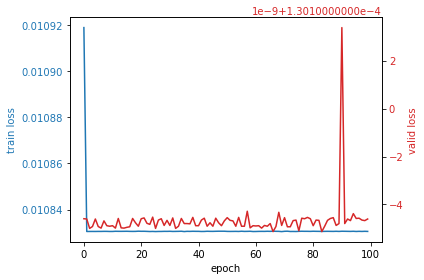

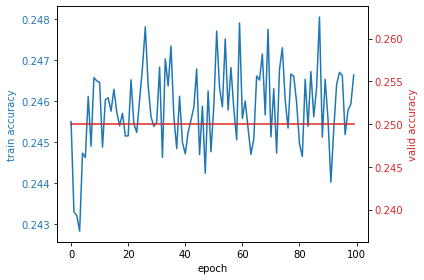

In [4]:
from importlib import reload
import utils
reload(utils)
utils.plot_curve(loss_log, 'loss')
utils.plot_curve(accuracy_log, 'accuracy')

# Test SI and model that mul M to I

In [1]:
from dataset.matDataset import SI_dataset
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
import torch

from models import *
from trial import *


model = AttentionNet(
    input_size = (22, 562),
    activate_func = nn.ELU,
    dropout = 0.9,
    kernel_size = 25,
    dense_size = 128,
    filter_number = 32
)


optimizer = optim.Adam(
    model.parameters(),
    lr = 0.00001,
    weight_decay = 0.1
)
 
train_dataset = SI_dataset()
test_dataset = SI_dataset(train = False)

train_loader = DataLoader(train_dataset, batch_size = 128)


device = torch.device('cuda:0')

model, loss_log, accuracy_log = train(model, device, nn.CrossEntropyLoss(), optimizer, 400, train_loader, test_dataset)



Training Epoch 01/400: 100%|██████████| 36/36 [00:11<00:00,  3.24batch/s, accuracy=28.9, loss=0.0109]


current loss: 0.004811549766196145, current accuracy: 0.23958333333333334


Training Epoch 02/400: 100%|██████████| 36/36 [00:03<00:00, 10.54batch/s, accuracy=26.6, loss=0.0112]


current loss: 0.004811808466911316, current accuracy: 0.22916666666666666


Training Epoch 03/400: 100%|██████████| 36/36 [00:03<00:00, 10.71batch/s, accuracy=25.8, loss=0.0109]


current loss: 0.004812212453948127, current accuracy: 0.23958333333333334


Training Epoch 04/400: 100%|██████████| 36/36 [00:03<00:00, 10.99batch/s, accuracy=28.1, loss=0.0111]


current loss: 0.004814866930246353, current accuracy: 0.2361111111111111


Training Epoch 05/400: 100%|██████████| 36/36 [00:03<00:00, 10.76batch/s, accuracy=18, loss=0.0112]  


current loss: 0.004813534932004081, current accuracy: 0.24305555555555555


Training Epoch 06/400: 100%|██████████| 36/36 [00:03<00:00, 10.53batch/s, accuracy=27.3, loss=0.0108]


current loss: 0.004813178545898861, current accuracy: 0.2465277777777778


Training Epoch 07/400: 100%|██████████| 36/36 [00:03<00:00, 10.40batch/s, accuracy=22.7, loss=0.0111]


current loss: 0.004813527067502339, current accuracy: 0.25


Training Epoch 08/400: 100%|██████████| 36/36 [00:03<00:00, 10.46batch/s, accuracy=13.3, loss=0.0111]


current loss: 0.004813666145006816, current accuracy: 0.25


Training Epoch 09/400: 100%|██████████| 36/36 [00:03<00:00, 10.49batch/s, accuracy=25, loss=0.011]   


current loss: 0.0048142414953973554, current accuracy: 0.25


Training Epoch 10/400: 100%|██████████| 36/36 [00:03<00:00, 10.64batch/s, accuracy=26.6, loss=0.0109]


current loss: 0.004813869794209798, current accuracy: 0.2534722222222222


Training Epoch 11/400: 100%|██████████| 36/36 [00:03<00:00, 10.63batch/s, accuracy=30.5, loss=0.0108]


current loss: 0.004814169473118252, current accuracy: 0.2361111111111111


Training Epoch 12/400: 100%|██████████| 36/36 [00:03<00:00, 10.68batch/s, accuracy=24.2, loss=0.0109]


current loss: 0.004813784940375222, current accuracy: 0.2534722222222222


Training Epoch 13/400: 100%|██████████| 36/36 [00:03<00:00, 10.60batch/s, accuracy=28.1, loss=0.0108]


current loss: 0.004814197205834919, current accuracy: 0.23958333333333334


Training Epoch 14/400: 100%|██████████| 36/36 [00:03<00:00, 11.03batch/s, accuracy=24.2, loss=0.0109]


current loss: 0.004813840405808555, current accuracy: 0.25


Training Epoch 15/400: 100%|██████████| 36/36 [00:03<00:00, 10.64batch/s, accuracy=18, loss=0.0112]  


current loss: 0.00481340123547448, current accuracy: 0.25


Training Epoch 16/400: 100%|██████████| 36/36 [00:03<00:00, 10.87batch/s, accuracy=18.8, loss=0.011] 


current loss: 0.00481433586941825, current accuracy: 0.23958333333333334


Training Epoch 17/400: 100%|██████████| 36/36 [00:03<00:00, 10.85batch/s, accuracy=25.8, loss=0.0109]


current loss: 0.0048142485320568085, current accuracy: 0.24305555555555555


Training Epoch 18/400: 100%|██████████| 36/36 [00:03<00:00, 10.87batch/s, accuracy=28.9, loss=0.0109]


current loss: 0.00481409662299686, current accuracy: 0.24305555555555555


Training Epoch 19/400: 100%|██████████| 36/36 [00:03<00:00, 10.76batch/s, accuracy=20.3, loss=0.0109]


current loss: 0.004813874347342385, current accuracy: 0.2465277777777778


Training Epoch 20/400: 100%|██████████| 36/36 [00:03<00:00, 10.86batch/s, accuracy=28.9, loss=0.0109]


current loss: 0.004814007216029697, current accuracy: 0.23958333333333334


Training Epoch 21/400: 100%|██████████| 36/36 [00:03<00:00, 10.63batch/s, accuracy=23.4, loss=0.011] 


current loss: 0.0048140109413199956, current accuracy: 0.24305555555555555


Training Epoch 22/400: 100%|██████████| 36/36 [00:03<00:00, 10.75batch/s, accuracy=22.7, loss=0.0108]


current loss: 0.00481351837515831, current accuracy: 0.2534722222222222


Training Epoch 23/400: 100%|██████████| 36/36 [00:03<00:00, 10.85batch/s, accuracy=19.5, loss=0.0109]


current loss: 0.004813559353351593, current accuracy: 0.25


Training Epoch 24/400: 100%|██████████| 36/36 [00:03<00:00, 10.70batch/s, accuracy=19.5, loss=0.0111]


current loss: 0.004813707537121243, current accuracy: 0.2326388888888889


Training Epoch 25/400: 100%|██████████| 36/36 [00:03<00:00, 10.91batch/s, accuracy=22.7, loss=0.011] 


current loss: 0.0048143938183784485, current accuracy: 0.22916666666666666


Training Epoch 26/400: 100%|██████████| 36/36 [00:03<00:00, 10.80batch/s, accuracy=24.2, loss=0.011] 


current loss: 0.0048144132726722294, current accuracy: 0.2361111111111111


Training Epoch 27/400: 100%|██████████| 36/36 [00:03<00:00, 10.87batch/s, accuracy=18.8, loss=0.011] 


current loss: 0.004814198861519496, current accuracy: 0.2361111111111111


Training Epoch 28/400: 100%|██████████| 36/36 [00:03<00:00, 10.49batch/s, accuracy=19.5, loss=0.0109]


current loss: 0.0048141272531615365, current accuracy: 0.2326388888888889


Training Epoch 29/400: 100%|██████████| 36/36 [00:03<00:00, 10.57batch/s, accuracy=28.1, loss=0.0109]


current loss: 0.004814516339037154, current accuracy: 0.2326388888888889


Training Epoch 30/400: 100%|██████████| 36/36 [00:03<00:00, 10.89batch/s, accuracy=27.3, loss=0.0108]


current loss: 0.004814106557104323, current accuracy: 0.2465277777777778


Training Epoch 31/400: 100%|██████████| 36/36 [00:03<00:00, 10.78batch/s, accuracy=24.2, loss=0.011] 


current loss: 0.00481362102760209, current accuracy: 0.23958333333333334


Training Epoch 32/400: 100%|██████████| 36/36 [00:03<00:00, 10.74batch/s, accuracy=30.5, loss=0.0108]


current loss: 0.004813948025306066, current accuracy: 0.24305555555555555


Training Epoch 33/400: 100%|██████████| 36/36 [00:03<00:00, 10.65batch/s, accuracy=25.8, loss=0.0109]


current loss: 0.0048137907352712415, current accuracy: 0.23958333333333334


Training Epoch 34/400: 100%|██████████| 36/36 [00:03<00:00, 10.88batch/s, accuracy=30.5, loss=0.0109]


current loss: 0.00481416823135482, current accuracy: 0.2465277777777778


Training Epoch 35/400: 100%|██████████| 36/36 [00:03<00:00, 10.72batch/s, accuracy=23.4, loss=0.0109]


current loss: 0.004814924879206551, current accuracy: 0.22916666666666666


Training Epoch 36/400: 100%|██████████| 36/36 [00:03<00:00, 10.85batch/s, accuracy=24.2, loss=0.0109]


current loss: 0.004814235286580192, current accuracy: 0.2361111111111111


Training Epoch 37/400: 100%|██████████| 36/36 [00:03<00:00, 10.89batch/s, accuracy=28.1, loss=0.0108]


current loss: 0.0048136769069565665, current accuracy: 0.24305555555555555


Training Epoch 38/400: 100%|██████████| 36/36 [00:03<00:00, 10.54batch/s, accuracy=23.4, loss=0.011] 


current loss: 0.00481366945637597, current accuracy: 0.23958333333333334


Training Epoch 39/400: 100%|██████████| 36/36 [00:03<00:00, 10.85batch/s, accuracy=28.1, loss=0.0108]


current loss: 0.004813755138052834, current accuracy: 0.25


Training Epoch 40/400: 100%|██████████| 36/36 [00:03<00:00, 10.84batch/s, accuracy=28.1, loss=0.0108]


current loss: 0.004813892145951589, current accuracy: 0.22916666666666666


Training Epoch 41/400: 100%|██████████| 36/36 [00:03<00:00, 10.99batch/s, accuracy=29.7, loss=0.0108]


current loss: 0.004813592467043135, current accuracy: 0.24305555555555555


Training Epoch 42/400: 100%|██████████| 36/36 [00:03<00:00, 10.73batch/s, accuracy=24.2, loss=0.0109]


current loss: 0.004813462081882689, current accuracy: 0.2361111111111111


Training Epoch 43/400: 100%|██████████| 36/36 [00:03<00:00, 10.78batch/s, accuracy=28.9, loss=0.0109]


current loss: 0.004813454631302092, current accuracy: 0.2361111111111111


Training Epoch 44/400: 100%|██████████| 36/36 [00:03<00:00, 10.91batch/s, accuracy=28.9, loss=0.0108]


current loss: 0.004813347425725725, current accuracy: 0.2361111111111111


Training Epoch 45/400: 100%|██████████| 36/36 [00:03<00:00, 10.61batch/s, accuracy=25.8, loss=0.0108]


current loss: 0.004812935160266029, current accuracy: 0.2569444444444444


Training Epoch 46/400: 100%|██████████| 36/36 [00:03<00:00, 10.80batch/s, accuracy=22.7, loss=0.011] 


current loss: 0.004813348253568013, current accuracy: 0.22916666666666666


Training Epoch 47/400: 100%|██████████| 36/36 [00:03<00:00, 10.88batch/s, accuracy=23.4, loss=0.0108]


current loss: 0.004812931848896874, current accuracy: 0.2465277777777778


Training Epoch 48/400: 100%|██████████| 36/36 [00:03<00:00, 10.73batch/s, accuracy=23.4, loss=0.0109]


current loss: 0.004812998076279958, current accuracy: 0.2465277777777778


Training Epoch 49/400: 100%|██████████| 36/36 [00:03<00:00, 10.83batch/s, accuracy=28.1, loss=0.0108]


current loss: 0.004813602401150597, current accuracy: 0.2361111111111111


Training Epoch 50/400: 100%|██████████| 36/36 [00:03<00:00, 10.78batch/s, accuracy=32.8, loss=0.0106]


current loss: 0.004813099486960305, current accuracy: 0.24305555555555555


Training Epoch 51/400: 100%|██████████| 36/36 [00:03<00:00, 10.84batch/s, accuracy=21.1, loss=0.0109]


current loss: 0.004812074204285939, current accuracy: 0.24305555555555555


Training Epoch 52/400: 100%|██████████| 36/36 [00:03<00:00, 10.64batch/s, accuracy=25.8, loss=0.0108]


current loss: 0.004812106904056337, current accuracy: 0.24305555555555555


Training Epoch 53/400: 100%|██████████| 36/36 [00:03<00:00, 10.91batch/s, accuracy=23.4, loss=0.0109]


current loss: 0.004813146260049608, current accuracy: 0.2534722222222222


Training Epoch 54/400: 100%|██████████| 36/36 [00:03<00:00, 10.89batch/s, accuracy=22.7, loss=0.0108]


current loss: 0.004812023291985194, current accuracy: 0.2569444444444444


Training Epoch 55/400: 100%|██████████| 36/36 [00:03<00:00, 10.89batch/s, accuracy=25.8, loss=0.0108]


current loss: 0.00481132459309366, current accuracy: 0.2465277777777778


Training Epoch 56/400: 100%|██████████| 36/36 [00:03<00:00, 10.89batch/s, accuracy=25.8, loss=0.0108]


current loss: 0.0048109690348307295, current accuracy: 0.23958333333333334


Training Epoch 57/400: 100%|██████████| 36/36 [00:03<00:00, 10.78batch/s, accuracy=21.9, loss=0.0109]


current loss: 0.004810709092352126, current accuracy: 0.2569444444444444


Training Epoch 58/400: 100%|██████████| 36/36 [00:03<00:00, 10.83batch/s, accuracy=21.1, loss=0.0108]


current loss: 0.004811055130428738, current accuracy: 0.2569444444444444


Training Epoch 59/400: 100%|██████████| 36/36 [00:03<00:00, 10.74batch/s, accuracy=25, loss=0.0108]  


current loss: 0.004810487644539939, current accuracy: 0.2569444444444444


Training Epoch 60/400: 100%|██████████| 36/36 [00:03<00:00, 10.79batch/s, accuracy=25, loss=0.0108]  


current loss: 0.00480997148487303, current accuracy: 0.2534722222222222


Training Epoch 61/400: 100%|██████████| 36/36 [00:03<00:00, 10.83batch/s, accuracy=19.5, loss=0.011] 


current loss: 0.004810039781861835, current accuracy: 0.2604166666666667


Training Epoch 62/400: 100%|██████████| 36/36 [00:03<00:00, 10.80batch/s, accuracy=28.1, loss=0.0108]


current loss: 0.0048100025289588505, current accuracy: 0.2534722222222222


Training Epoch 63/400: 100%|██████████| 36/36 [00:03<00:00, 10.81batch/s, accuracy=24.2, loss=0.0108]


current loss: 0.004809626274638706, current accuracy: 0.24305555555555555


Training Epoch 64/400: 100%|██████████| 36/36 [00:03<00:00, 10.65batch/s, accuracy=23.4, loss=0.0108]


current loss: 0.004808331115378274, current accuracy: 0.2604166666666667


Training Epoch 65/400: 100%|██████████| 36/36 [00:03<00:00, 10.62batch/s, accuracy=27.3, loss=0.0107]


current loss: 0.004807569086551666, current accuracy: 0.2708333333333333


Training Epoch 66/400: 100%|██████████| 36/36 [00:03<00:00, 10.71batch/s, accuracy=27.3, loss=0.0108]


current loss: 0.004807990872197681, current accuracy: 0.2465277777777778


Training Epoch 67/400: 100%|██████████| 36/36 [00:03<00:00, 10.55batch/s, accuracy=29.7, loss=0.0109]


current loss: 0.004807859659194946, current accuracy: 0.2638888888888889


Training Epoch 68/400: 100%|██████████| 36/36 [00:03<00:00, 10.68batch/s, accuracy=24.2, loss=0.0109]


current loss: 0.0048074863023228115, current accuracy: 0.2673611111111111


Training Epoch 69/400: 100%|██████████| 36/36 [00:03<00:00, 10.61batch/s, accuracy=28.9, loss=0.0108]


current loss: 0.0048056294520696, current accuracy: 0.2673611111111111


Training Epoch 70/400: 100%|██████████| 36/36 [00:03<00:00, 10.70batch/s, accuracy=25.8, loss=0.0108]


current loss: 0.004806917160749435, current accuracy: 0.2638888888888889


Training Epoch 71/400: 100%|██████████| 36/36 [00:03<00:00, 10.54batch/s, accuracy=27.3, loss=0.0107]


current loss: 0.004803847107622359, current accuracy: 0.2673611111111111


Training Epoch 72/400: 100%|██████████| 36/36 [00:03<00:00, 10.87batch/s, accuracy=32, loss=0.0108]  


current loss: 0.004802955521477593, current accuracy: 0.2743055555555556


Training Epoch 73/400: 100%|██████████| 36/36 [00:03<00:00, 10.58batch/s, accuracy=25.8, loss=0.0107]


current loss: 0.004801278313000997, current accuracy: 0.2673611111111111


Training Epoch 74/400: 100%|██████████| 36/36 [00:03<00:00, 10.70batch/s, accuracy=29.7, loss=0.0107]


current loss: 0.00480263556043307, current accuracy: 0.2708333333333333


Training Epoch 75/400: 100%|██████████| 36/36 [00:03<00:00, 10.46batch/s, accuracy=30.5, loss=0.0107]


current loss: 0.004799552261829376, current accuracy: 0.2847222222222222


Training Epoch 76/400: 100%|██████████| 36/36 [00:03<00:00, 10.68batch/s, accuracy=23.4, loss=0.0108]


current loss: 0.004796849770678414, current accuracy: 0.2743055555555556


Training Epoch 77/400: 100%|██████████| 36/36 [00:03<00:00, 10.73batch/s, accuracy=26.6, loss=0.0108]


current loss: 0.004795069081915749, current accuracy: 0.2881944444444444


Training Epoch 78/400: 100%|██████████| 36/36 [00:03<00:00, 10.56batch/s, accuracy=32, loss=0.0107]  


current loss: 0.004794187429878447, current accuracy: 0.2986111111111111


Training Epoch 79/400: 100%|██████████| 36/36 [00:03<00:00, 10.63batch/s, accuracy=35.9, loss=0.0106]


current loss: 0.004791899687714047, current accuracy: 0.2881944444444444


Training Epoch 80/400: 100%|██████████| 36/36 [00:03<00:00, 10.44batch/s, accuracy=33.6, loss=0.0107]


current loss: 0.0047890548076894544, current accuracy: 0.28125


Training Epoch 81/400: 100%|██████████| 36/36 [00:03<00:00, 10.83batch/s, accuracy=32.8, loss=0.0106]


current loss: 0.004785347729921341, current accuracy: 0.28125


Training Epoch 82/400: 100%|██████████| 36/36 [00:03<00:00, 10.67batch/s, accuracy=39.1, loss=0.0105]


current loss: 0.004783187061548233, current accuracy: 0.2777777777777778


Training Epoch 83/400: 100%|██████████| 36/36 [00:03<00:00, 10.75batch/s, accuracy=33.6, loss=0.0105]


current loss: 0.004780429518885083, current accuracy: 0.28125


Training Epoch 84/400: 100%|██████████| 36/36 [00:03<00:00, 10.59batch/s, accuracy=33.6, loss=0.0106]


current loss: 0.00477988686826494, current accuracy: 0.2847222222222222


Training Epoch 85/400: 100%|██████████| 36/36 [00:03<00:00, 10.68batch/s, accuracy=38.3, loss=0.0103]


current loss: 0.004781999521785312, current accuracy: 0.2708333333333333


Training Epoch 86/400: 100%|██████████| 36/36 [00:03<00:00, 10.71batch/s, accuracy=32.8, loss=0.0104]


current loss: 0.004767667088243697, current accuracy: 0.28125


Training Epoch 87/400: 100%|██████████| 36/36 [00:03<00:00, 10.65batch/s, accuracy=32.8, loss=0.0103]


current loss: 0.004769742488861084, current accuracy: 0.2847222222222222


Training Epoch 88/400: 100%|██████████| 36/36 [00:03<00:00, 10.88batch/s, accuracy=41.4, loss=0.0101]


current loss: 0.004768973837296168, current accuracy: 0.2708333333333333


Training Epoch 89/400: 100%|██████████| 36/36 [00:03<00:00, 10.69batch/s, accuracy=33.6, loss=0.0102]


current loss: 0.004765574302938249, current accuracy: 0.2708333333333333


Training Epoch 90/400: 100%|██████████| 36/36 [00:03<00:00, 10.78batch/s, accuracy=39.1, loss=0.0102]


current loss: 0.004774173928631676, current accuracy: 0.2673611111111111


Training Epoch 91/400: 100%|██████████| 36/36 [00:03<00:00, 10.84batch/s, accuracy=40.6, loss=0.01]   


current loss: 0.004772237191597621, current accuracy: 0.24305555555555555


Training Epoch 92/400: 100%|██████████| 36/36 [00:03<00:00, 10.53batch/s, accuracy=40.6, loss=0.00994]


current loss: 0.004761200812127855, current accuracy: 0.2638888888888889


Training Epoch 93/400: 100%|██████████| 36/36 [00:03<00:00, 10.66batch/s, accuracy=43.8, loss=0.01]   


current loss: 0.004772384547524982, current accuracy: 0.2604166666666667


Training Epoch 94/400: 100%|██████████| 36/36 [00:03<00:00, 10.68batch/s, accuracy=39.8, loss=0.00999]


current loss: 0.00476088747382164, current accuracy: 0.2638888888888889


Training Epoch 95/400: 100%|██████████| 36/36 [00:03<00:00, 10.80batch/s, accuracy=43, loss=0.00971]  


current loss: 0.004775427281856537, current accuracy: 0.2673611111111111


Training Epoch 96/400: 100%|██████████| 36/36 [00:03<00:00, 10.86batch/s, accuracy=38.3, loss=0.00982]


current loss: 0.0047841618458429975, current accuracy: 0.2638888888888889


Training Epoch 97/400: 100%|██████████| 36/36 [00:03<00:00, 10.57batch/s, accuracy=41.4, loss=0.00979]


current loss: 0.0047712479200628065, current accuracy: 0.2673611111111111


Training Epoch 98/400: 100%|██████████| 36/36 [00:03<00:00, 10.69batch/s, accuracy=40.6, loss=0.0098] 


current loss: 0.004773130019505818, current accuracy: 0.2638888888888889


Training Epoch 99/400: 100%|██████████| 36/36 [00:03<00:00, 10.59batch/s, accuracy=45.3, loss=0.00954]


current loss: 0.004776714576615227, current accuracy: 0.2673611111111111


Training Epoch 100/400: 100%|██████████| 36/36 [00:03<00:00, 10.44batch/s, accuracy=46.9, loss=0.00922]


current loss: 0.004816003971629673, current accuracy: 0.2638888888888889


Training Epoch 101/400: 100%|██████████| 36/36 [00:03<00:00, 10.67batch/s, accuracy=43, loss=0.00964]  


current loss: 0.004792127344343398, current accuracy: 0.28125


Training Epoch 102/400: 100%|██████████| 36/36 [00:03<00:00, 10.63batch/s, accuracy=48.4, loss=0.00954]


current loss: 0.004821774860223134, current accuracy: 0.28125


Training Epoch 103/400: 100%|██████████| 36/36 [00:03<00:00, 10.63batch/s, accuracy=37.5, loss=0.00966]


current loss: 0.004825100302696228, current accuracy: 0.2847222222222222


Training Epoch 104/400: 100%|██████████| 36/36 [00:03<00:00, 10.27batch/s, accuracy=41.4, loss=0.0094] 


current loss: 0.004860252141952515, current accuracy: 0.28125


Training Epoch 105/400: 100%|██████████| 36/36 [00:03<00:00, 10.50batch/s, accuracy=44.5, loss=0.00916]


current loss: 0.004864867776632309, current accuracy: 0.2708333333333333


Training Epoch 106/400: 100%|██████████| 36/36 [00:03<00:00, 10.34batch/s, accuracy=43, loss=0.00946]  


current loss: 0.004889100790023804, current accuracy: 0.2743055555555556


Training Epoch 107/400: 100%|██████████| 36/36 [00:03<00:00, 10.27batch/s, accuracy=40.6, loss=0.00941]


current loss: 0.004917493710915248, current accuracy: 0.2881944444444444


Training Epoch 108/400: 100%|██████████| 36/36 [00:03<00:00, 10.44batch/s, accuracy=42.2, loss=0.00923]


current loss: 0.004938989463779662, current accuracy: 0.2881944444444444


Training Epoch 109/400: 100%|██████████| 36/36 [00:03<00:00, 10.22batch/s, accuracy=45.3, loss=0.00902]


current loss: 0.004959793554411994, current accuracy: 0.2916666666666667


Training Epoch 110/400: 100%|██████████| 36/36 [00:03<00:00, 10.46batch/s, accuracy=40.6, loss=0.00914]


current loss: 0.005009182625346714, current accuracy: 0.2777777777777778


Training Epoch 111/400: 100%|██████████| 36/36 [00:03<00:00, 10.60batch/s, accuracy=48.4, loss=0.00882]


current loss: 0.0050321850511762835, current accuracy: 0.2847222222222222


Training Epoch 112/400: 100%|██████████| 36/36 [00:03<00:00, 10.40batch/s, accuracy=46.1, loss=0.00891]


current loss: 0.005077047480477227, current accuracy: 0.2743055555555556


Training Epoch 113/400: 100%|██████████| 36/36 [00:03<00:00, 10.40batch/s, accuracy=44.5, loss=0.00925]


current loss: 0.005092013213369582, current accuracy: 0.2777777777777778


Training Epoch 114/400: 100%|██████████| 36/36 [00:03<00:00, 10.40batch/s, accuracy=39.8, loss=0.00921]


current loss: 0.00512771349814203, current accuracy: 0.2847222222222222


Training Epoch 115/400: 100%|██████████| 36/36 [00:03<00:00, 10.41batch/s, accuracy=46.1, loss=0.00894]


current loss: 0.0051337964832782745, current accuracy: 0.2777777777777778


Training Epoch 116/400: 100%|██████████| 36/36 [00:03<00:00, 10.51batch/s, accuracy=43, loss=0.00892]  


current loss: 0.005132630467414856, current accuracy: 0.2986111111111111


Training Epoch 117/400: 100%|██████████| 36/36 [00:03<00:00, 10.61batch/s, accuracy=45.3, loss=0.00871]


current loss: 0.00517713940805859, current accuracy: 0.2881944444444444


Training Epoch 118/400: 100%|██████████| 36/36 [00:03<00:00, 10.55batch/s, accuracy=47.7, loss=0.00865]


current loss: 0.0051847704582744175, current accuracy: 0.2916666666666667


Training Epoch 119/400: 100%|██████████| 36/36 [00:03<00:00, 10.52batch/s, accuracy=43, loss=0.00881]  


current loss: 0.0052358292871051365, current accuracy: 0.2881944444444444


Training Epoch 120/400: 100%|██████████| 36/36 [00:03<00:00, 10.21batch/s, accuracy=39.1, loss=0.0092] 


current loss: 0.005209484034114414, current accuracy: 0.2916666666666667


Training Epoch 121/400: 100%|██████████| 36/36 [00:03<00:00, 10.45batch/s, accuracy=46.9, loss=0.00897]


current loss: 0.005259297788143158, current accuracy: 0.2986111111111111


Training Epoch 122/400: 100%|██████████| 36/36 [00:03<00:00, 10.61batch/s, accuracy=50, loss=0.00845]  


current loss: 0.005307183083560731, current accuracy: 0.2916666666666667


Training Epoch 123/400: 100%|██████████| 36/36 [00:03<00:00, 10.33batch/s, accuracy=52.3, loss=0.00849]


current loss: 0.005312460992071364, current accuracy: 0.2986111111111111


Training Epoch 124/400: 100%|██████████| 36/36 [00:03<00:00, 10.51batch/s, accuracy=46.1, loss=0.0087] 


current loss: 0.005398274709781011, current accuracy: 0.2916666666666667


Training Epoch 125/400: 100%|██████████| 36/36 [00:03<00:00, 10.37batch/s, accuracy=50.8, loss=0.00847]


current loss: 0.005406682276063495, current accuracy: 0.2986111111111111


Training Epoch 126/400: 100%|██████████| 36/36 [00:03<00:00, 10.38batch/s, accuracy=43, loss=0.00888]  


current loss: 0.0054369428091579014, current accuracy: 0.2916666666666667


Training Epoch 127/400: 100%|██████████| 36/36 [00:03<00:00, 10.34batch/s, accuracy=50, loss=0.00839]  


current loss: 0.005439287672440211, current accuracy: 0.2951388888888889


Training Epoch 128/400: 100%|██████████| 36/36 [00:03<00:00, 10.41batch/s, accuracy=47.7, loss=0.00871]


current loss: 0.005451745457119412, current accuracy: 0.3020833333333333


Training Epoch 129/400: 100%|██████████| 36/36 [00:03<00:00, 10.59batch/s, accuracy=46.1, loss=0.00864]


current loss: 0.005490332841873169, current accuracy: 0.3055555555555556


Training Epoch 130/400: 100%|██████████| 36/36 [00:03<00:00, 10.48batch/s, accuracy=46.1, loss=0.00884]


current loss: 0.005444758882125218, current accuracy: 0.3159722222222222


Training Epoch 131/400: 100%|██████████| 36/36 [00:03<00:00, 10.78batch/s, accuracy=46.1, loss=0.00905]


current loss: 0.005531357394324409, current accuracy: 0.3055555555555556


Training Epoch 132/400: 100%|██████████| 36/36 [00:03<00:00, 10.59batch/s, accuracy=53.1, loss=0.00844]


current loss: 0.005515829970439275, current accuracy: 0.3090277777777778


Training Epoch 133/400: 100%|██████████| 36/36 [00:03<00:00, 10.63batch/s, accuracy=44.5, loss=0.00838]


current loss: 0.005609118276172214, current accuracy: 0.3055555555555556


Training Epoch 134/400: 100%|██████████| 36/36 [00:03<00:00, 10.77batch/s, accuracy=49.2, loss=0.00833]


current loss: 0.005657966766092513, current accuracy: 0.2916666666666667


Training Epoch 135/400: 100%|██████████| 36/36 [00:03<00:00, 10.53batch/s, accuracy=50.8, loss=0.00859]


current loss: 0.005704724540313085, current accuracy: 0.2951388888888889


Training Epoch 136/400: 100%|██████████| 36/36 [00:03<00:00, 10.69batch/s, accuracy=50, loss=0.00849]  


current loss: 0.0056790245903862845, current accuracy: 0.3020833333333333


Training Epoch 137/400: 100%|██████████| 36/36 [00:03<00:00, 10.56batch/s, accuracy=46.1, loss=0.00855]


current loss: 0.005663936336835225, current accuracy: 0.3055555555555556


Training Epoch 138/400: 100%|██████████| 36/36 [00:03<00:00, 10.75batch/s, accuracy=45.3, loss=0.00862]


current loss: 0.00579809480243259, current accuracy: 0.3055555555555556


Training Epoch 139/400: 100%|██████████| 36/36 [00:03<00:00, 10.29batch/s, accuracy=44.5, loss=0.00848]


current loss: 0.0057863158484299975, current accuracy: 0.2881944444444444


Training Epoch 140/400: 100%|██████████| 36/36 [00:03<00:00, 10.38batch/s, accuracy=46.1, loss=0.0085] 


current loss: 0.005816130174530877, current accuracy: 0.2986111111111111


Training Epoch 141/400: 100%|██████████| 36/36 [00:03<00:00, 10.46batch/s, accuracy=48.4, loss=0.00826]


current loss: 0.005892354167169995, current accuracy: 0.2916666666666667


Training Epoch 142/400: 100%|██████████| 36/36 [00:03<00:00, 10.56batch/s, accuracy=46.1, loss=0.00849]


current loss: 0.005874210761653053, current accuracy: 0.2916666666666667


Training Epoch 143/400: 100%|██████████| 36/36 [00:03<00:00, 10.67batch/s, accuracy=49.2, loss=0.0082] 


current loss: 0.005897997568051021, current accuracy: 0.2986111111111111


Training Epoch 144/400: 100%|██████████| 36/36 [00:03<00:00, 11.12batch/s, accuracy=53.1, loss=0.00829]


current loss: 0.005974912809001075, current accuracy: 0.3125


Training Epoch 145/400: 100%|██████████| 36/36 [00:03<00:00, 11.10batch/s, accuracy=49.2, loss=0.00843]


current loss: 0.005993814931975471, current accuracy: 0.3090277777777778


Training Epoch 146/400: 100%|██████████| 36/36 [00:03<00:00, 11.54batch/s, accuracy=51.6, loss=0.00806]


current loss: 0.005956072360277176, current accuracy: 0.3090277777777778


Training Epoch 147/400: 100%|██████████| 36/36 [00:03<00:00, 10.72batch/s, accuracy=47.7, loss=0.00816]


current loss: 0.006041821092367172, current accuracy: 0.2881944444444444


Training Epoch 148/400: 100%|██████████| 36/36 [00:03<00:00, 10.77batch/s, accuracy=44.5, loss=0.00821]


current loss: 0.005996891193919712, current accuracy: 0.2951388888888889


Training Epoch 149/400: 100%|██████████| 36/36 [00:03<00:00, 10.67batch/s, accuracy=45.3, loss=0.00832]


current loss: 0.006040759384632111, current accuracy: 0.2916666666666667


Training Epoch 150/400: 100%|██████████| 36/36 [00:03<00:00, 10.54batch/s, accuracy=45.3, loss=0.0084] 


current loss: 0.006051247732506858, current accuracy: 0.2847222222222222


Training Epoch 151/400: 100%|██████████| 36/36 [00:03<00:00, 10.63batch/s, accuracy=53.1, loss=0.00801]


current loss: 0.006041294170750512, current accuracy: 0.3020833333333333


Training Epoch 152/400: 100%|██████████| 36/36 [00:03<00:00, 10.71batch/s, accuracy=49.2, loss=0.00813]


current loss: 0.0060857244663768345, current accuracy: 0.2986111111111111


Training Epoch 153/400: 100%|██████████| 36/36 [00:03<00:00, 10.80batch/s, accuracy=53.1, loss=0.00806]


current loss: 0.006228510290384293, current accuracy: 0.2916666666666667


Training Epoch 154/400: 100%|██████████| 36/36 [00:03<00:00, 11.26batch/s, accuracy=47.7, loss=0.0081] 


current loss: 0.006223369389772415, current accuracy: 0.3020833333333333


Training Epoch 155/400: 100%|██████████| 36/36 [00:03<00:00, 11.40batch/s, accuracy=50, loss=0.00804]  


current loss: 0.00617006379697058, current accuracy: 0.2951388888888889


Training Epoch 156/400: 100%|██████████| 36/36 [00:03<00:00, 11.37batch/s, accuracy=50, loss=0.00787]  


current loss: 0.006267960286802716, current accuracy: 0.2847222222222222


Training Epoch 157/400: 100%|██████████| 36/36 [00:03<00:00, 11.53batch/s, accuracy=48.4, loss=0.00784]


current loss: 0.006342658152182897, current accuracy: 0.3055555555555556


Training Epoch 158/400: 100%|██████████| 36/36 [00:03<00:00, 11.49batch/s, accuracy=49.2, loss=0.00789]


current loss: 0.006296428541342418, current accuracy: 0.3090277777777778


Training Epoch 159/400: 100%|██████████| 36/36 [00:03<00:00, 11.26batch/s, accuracy=53.1, loss=0.00772]


current loss: 0.006332734392748939, current accuracy: 0.2986111111111111


Training Epoch 160/400: 100%|██████████| 36/36 [00:03<00:00, 11.32batch/s, accuracy=52.3, loss=0.0078] 


current loss: 0.006350197311904695, current accuracy: 0.2881944444444444


Training Epoch 161/400: 100%|██████████| 36/36 [00:03<00:00, 11.41batch/s, accuracy=50, loss=0.00807]  


current loss: 0.00639603328373697, current accuracy: 0.2951388888888889


Training Epoch 162/400: 100%|██████████| 36/36 [00:03<00:00, 11.10batch/s, accuracy=44.5, loss=0.0084] 


current loss: 0.006365898168749279, current accuracy: 0.2986111111111111


Training Epoch 163/400: 100%|██████████| 36/36 [00:03<00:00, 10.68batch/s, accuracy=53.9, loss=0.00788]


current loss: 0.0064615002936787075, current accuracy: 0.2881944444444444


Training Epoch 164/400: 100%|██████████| 36/36 [00:03<00:00, 10.67batch/s, accuracy=51.6, loss=0.00812]


current loss: 0.00636968720290396, current accuracy: 0.2986111111111111


Training Epoch 165/400: 100%|██████████| 36/36 [00:03<00:00, 10.66batch/s, accuracy=55.5, loss=0.00802]


current loss: 0.006420378469758564, current accuracy: 0.2847222222222222


Training Epoch 166/400: 100%|██████████| 36/36 [00:03<00:00, 10.86batch/s, accuracy=53.1, loss=0.00775]


current loss: 0.006339030547274483, current accuracy: 0.2881944444444444


Training Epoch 167/400: 100%|██████████| 36/36 [00:03<00:00, 11.47batch/s, accuracy=48.4, loss=0.00769]


current loss: 0.006469616873396767, current accuracy: 0.2916666666666667


Training Epoch 168/400: 100%|██████████| 36/36 [00:03<00:00, 11.63batch/s, accuracy=47.7, loss=0.00843]


current loss: 0.00646206322643492, current accuracy: 0.2916666666666667


Training Epoch 169/400: 100%|██████████| 36/36 [00:03<00:00, 11.50batch/s, accuracy=52.3, loss=0.00768]


current loss: 0.006444670673873689, current accuracy: 0.2847222222222222


Training Epoch 170/400: 100%|██████████| 36/36 [00:03<00:00, 10.82batch/s, accuracy=43.8, loss=0.00805]


current loss: 0.006528796835078133, current accuracy: 0.2777777777777778


Training Epoch 171/400: 100%|██████████| 36/36 [00:03<00:00, 10.57batch/s, accuracy=49.2, loss=0.00794]


current loss: 0.006562591426902347, current accuracy: 0.2777777777777778


Training Epoch 172/400: 100%|██████████| 36/36 [00:03<00:00, 10.57batch/s, accuracy=47.7, loss=0.00783]


current loss: 0.006569006376796299, current accuracy: 0.2951388888888889


Training Epoch 173/400: 100%|██████████| 36/36 [00:03<00:00, 10.45batch/s, accuracy=43, loss=0.00778]  


current loss: 0.006643577996227477, current accuracy: 0.2951388888888889


Training Epoch 174/400: 100%|██████████| 36/36 [00:03<00:00, 10.64batch/s, accuracy=57, loss=0.00755]  


current loss: 0.006631640924347771, current accuracy: 0.2881944444444444


Training Epoch 175/400: 100%|██████████| 36/36 [00:03<00:00, 10.64batch/s, accuracy=51.6, loss=0.00772]


current loss: 0.006636365006367366, current accuracy: 0.2881944444444444


Training Epoch 176/400: 100%|██████████| 36/36 [00:03<00:00, 10.60batch/s, accuracy=56.2, loss=0.00773]


current loss: 0.0066932423247231376, current accuracy: 0.2881944444444444


Training Epoch 177/400: 100%|██████████| 36/36 [00:03<00:00, 10.67batch/s, accuracy=50.8, loss=0.00743]


current loss: 0.006679308911164601, current accuracy: 0.2951388888888889


Training Epoch 178/400: 100%|██████████| 36/36 [00:03<00:00, 10.35batch/s, accuracy=47.7, loss=0.00782]


current loss: 0.006694183581405216, current accuracy: 0.2916666666666667


Training Epoch 179/400: 100%|██████████| 36/36 [00:03<00:00, 10.42batch/s, accuracy=53.9, loss=0.00761]


current loss: 0.006682109501626756, current accuracy: 0.2951388888888889


Training Epoch 180/400: 100%|██████████| 36/36 [00:03<00:00, 10.43batch/s, accuracy=49.2, loss=0.00779]


current loss: 0.0067312320073445635, current accuracy: 0.2777777777777778


Training Epoch 181/400: 100%|██████████| 36/36 [00:03<00:00, 10.36batch/s, accuracy=41.4, loss=0.0082] 


current loss: 0.006713199118773143, current accuracy: 0.2951388888888889


Training Epoch 182/400: 100%|██████████| 36/36 [00:03<00:00, 10.59batch/s, accuracy=46.9, loss=0.00786]


current loss: 0.006840964158376058, current accuracy: 0.2708333333333333


Training Epoch 183/400: 100%|██████████| 36/36 [00:03<00:00, 10.32batch/s, accuracy=46.9, loss=0.00773]


current loss: 0.006736179192860921, current accuracy: 0.2916666666666667


Training Epoch 184/400: 100%|██████████| 36/36 [00:03<00:00, 10.41batch/s, accuracy=49.2, loss=0.00763]


current loss: 0.006737039320998722, current accuracy: 0.2916666666666667


Training Epoch 185/400: 100%|██████████| 36/36 [00:03<00:00, 10.53batch/s, accuracy=51.6, loss=0.00773]


current loss: 0.006738059222698212, current accuracy: 0.2986111111111111


Training Epoch 186/400: 100%|██████████| 36/36 [00:03<00:00, 10.50batch/s, accuracy=55.5, loss=0.00742]


current loss: 0.006825469020340178, current accuracy: 0.3055555555555556


Training Epoch 187/400: 100%|██████████| 36/36 [00:03<00:00, 10.39batch/s, accuracy=51.6, loss=0.00745]


current loss: 0.006846491247415543, current accuracy: 0.2881944444444444


Training Epoch 188/400: 100%|██████████| 36/36 [00:03<00:00, 10.67batch/s, accuracy=52.3, loss=0.00771]


current loss: 0.006852693855762482, current accuracy: 0.2951388888888889


Training Epoch 189/400: 100%|██████████| 36/36 [00:03<00:00, 10.52batch/s, accuracy=51.6, loss=0.00732]


current loss: 0.0068928201993306475, current accuracy: 0.2881944444444444


Training Epoch 190/400: 100%|██████████| 36/36 [00:03<00:00, 10.39batch/s, accuracy=53.1, loss=0.00784]


current loss: 0.006928369402885437, current accuracy: 0.2916666666666667


Training Epoch 191/400: 100%|██████████| 36/36 [00:03<00:00, 10.66batch/s, accuracy=50, loss=0.00754]  


current loss: 0.006955570644802517, current accuracy: 0.3055555555555556


Training Epoch 192/400: 100%|██████████| 36/36 [00:03<00:00, 10.38batch/s, accuracy=53.9, loss=0.00771]


current loss: 0.006920887364281548, current accuracy: 0.2847222222222222


Training Epoch 193/400: 100%|██████████| 36/36 [00:03<00:00, 10.43batch/s, accuracy=47.7, loss=0.0077] 


current loss: 0.006975022455056508, current accuracy: 0.28125


Training Epoch 194/400: 100%|██████████| 36/36 [00:03<00:00, 10.33batch/s, accuracy=49.2, loss=0.0078] 


current loss: 0.00689317203230328, current accuracy: 0.2777777777777778


Training Epoch 195/400: 100%|██████████| 36/36 [00:03<00:00, 10.34batch/s, accuracy=51.6, loss=0.00765]


current loss: 0.007002582152684529, current accuracy: 0.2916666666666667


Training Epoch 196/400: 100%|██████████| 36/36 [00:03<00:00, 10.57batch/s, accuracy=49.2, loss=0.00757]


current loss: 0.0069982144567701556, current accuracy: 0.2743055555555556


Training Epoch 197/400: 100%|██████████| 36/36 [00:03<00:00, 10.53batch/s, accuracy=54.7, loss=0.00723]


current loss: 0.0070722947518030805, current accuracy: 0.28125


Training Epoch 198/400: 100%|██████████| 36/36 [00:03<00:00, 10.63batch/s, accuracy=47.7, loss=0.00752]


current loss: 0.007004958060052659, current accuracy: 0.2881944444444444


Training Epoch 199/400: 100%|██████████| 36/36 [00:03<00:00, 10.55batch/s, accuracy=44.5, loss=0.00752]


current loss: 0.007036988106038835, current accuracy: 0.2847222222222222


Training Epoch 200/400: 100%|██████████| 36/36 [00:03<00:00, 10.62batch/s, accuracy=49.2, loss=0.00751]


current loss: 0.00701225135061476, current accuracy: 0.28125


Training Epoch 201/400: 100%|██████████| 36/36 [00:03<00:00, 10.32batch/s, accuracy=55.5, loss=0.00725]


current loss: 0.007158955766095055, current accuracy: 0.2673611111111111


Training Epoch 202/400: 100%|██████████| 36/36 [00:03<00:00, 10.49batch/s, accuracy=52.3, loss=0.00749]


current loss: 0.007186094919840495, current accuracy: 0.28125


Training Epoch 203/400: 100%|██████████| 36/36 [00:03<00:00, 10.55batch/s, accuracy=58.6, loss=0.0072] 


current loss: 0.00721117936902576, current accuracy: 0.2777777777777778


Training Epoch 204/400: 100%|██████████| 36/36 [00:03<00:00, 10.69batch/s, accuracy=49.2, loss=0.00765]


current loss: 0.007143937879138523, current accuracy: 0.28125


Training Epoch 205/400: 100%|██████████| 36/36 [00:03<00:00, 10.60batch/s, accuracy=50.8, loss=0.0074] 


current loss: 0.0072540971967909075, current accuracy: 0.2743055555555556


Training Epoch 206/400: 100%|██████████| 36/36 [00:03<00:00, 10.70batch/s, accuracy=48.4, loss=0.00741]


current loss: 0.007269822888904148, current accuracy: 0.2847222222222222


Training Epoch 207/400: 100%|██████████| 36/36 [00:03<00:00, 10.75batch/s, accuracy=46.9, loss=0.0076] 


current loss: 0.0073000482387012905, current accuracy: 0.2951388888888889


Training Epoch 208/400: 100%|██████████| 36/36 [00:03<00:00, 10.26batch/s, accuracy=54.7, loss=0.00749]


current loss: 0.007174358599715763, current accuracy: 0.2881944444444444


Training Epoch 209/400: 100%|██████████| 36/36 [00:03<00:00, 10.83batch/s, accuracy=53.1, loss=0.00758]


current loss: 0.007244510783089532, current accuracy: 0.2986111111111111


Training Epoch 210/400: 100%|██████████| 36/36 [00:03<00:00, 10.51batch/s, accuracy=53.1, loss=0.00755]


current loss: 0.0073188841342926025, current accuracy: 0.3020833333333333


Training Epoch 211/400: 100%|██████████| 36/36 [00:03<00:00, 11.02batch/s, accuracy=48.4, loss=0.00746]


current loss: 0.007298633456230164, current accuracy: 0.28125


Training Epoch 212/400: 100%|██████████| 36/36 [00:03<00:00, 10.39batch/s, accuracy=50.8, loss=0.00739]


current loss: 0.007356734739409553, current accuracy: 0.2847222222222222


Training Epoch 213/400: 100%|██████████| 36/36 [00:03<00:00, 11.20batch/s, accuracy=51.6, loss=0.00756]


current loss: 0.007354733844598134, current accuracy: 0.2847222222222222


Training Epoch 214/400: 100%|██████████| 36/36 [00:03<00:00, 11.75batch/s, accuracy=53.9, loss=0.00736]


current loss: 0.007425625291135576, current accuracy: 0.2916666666666667


Training Epoch 215/400: 100%|██████████| 36/36 [00:03<00:00, 10.52batch/s, accuracy=59.4, loss=0.0074] 


current loss: 0.007365722623136308, current accuracy: 0.28125


Training Epoch 216/400: 100%|██████████| 36/36 [00:03<00:00, 10.51batch/s, accuracy=57.8, loss=0.00736]


current loss: 0.0073996368381712176, current accuracy: 0.2743055555555556


Training Epoch 217/400: 100%|██████████| 36/36 [00:03<00:00, 10.40batch/s, accuracy=51.6, loss=0.00751]


current loss: 0.007380043466885884, current accuracy: 0.28125


Training Epoch 218/400: 100%|██████████| 36/36 [00:03<00:00, 10.27batch/s, accuracy=49.2, loss=0.00722]


current loss: 0.007396018339527978, current accuracy: 0.28125


Training Epoch 219/400: 100%|██████████| 36/36 [00:03<00:00, 10.92batch/s, accuracy=50.8, loss=0.00742]


current loss: 0.007453200717767079, current accuracy: 0.2847222222222222


Training Epoch 220/400: 100%|██████████| 36/36 [00:03<00:00, 11.10batch/s, accuracy=57.8, loss=0.00727]


current loss: 0.007501167555650075, current accuracy: 0.2847222222222222


Training Epoch 221/400: 100%|██████████| 36/36 [00:03<00:00, 10.87batch/s, accuracy=55.5, loss=0.00737]


current loss: 0.0074776046805911595, current accuracy: 0.3055555555555556


Training Epoch 222/400: 100%|██████████| 36/36 [00:03<00:00, 11.51batch/s, accuracy=55.5, loss=0.00715]


current loss: 0.0074478454060024684, current accuracy: 0.2881944444444444


Training Epoch 223/400: 100%|██████████| 36/36 [00:03<00:00, 10.91batch/s, accuracy=51.6, loss=0.00723]


current loss: 0.0075238462951448225, current accuracy: 0.2951388888888889


Training Epoch 224/400: 100%|██████████| 36/36 [00:03<00:00, 10.64batch/s, accuracy=55.5, loss=0.00719]


current loss: 0.00748196327024036, current accuracy: 0.2916666666666667


Training Epoch 225/400: 100%|██████████| 36/36 [00:03<00:00, 10.60batch/s, accuracy=42.2, loss=0.00739]


current loss: 0.007424573103586833, current accuracy: 0.2881944444444444


Training Epoch 226/400: 100%|██████████| 36/36 [00:03<00:00, 10.62batch/s, accuracy=50, loss=0.00718]  


current loss: 0.0074540070361561244, current accuracy: 0.2847222222222222


Training Epoch 227/400: 100%|██████████| 36/36 [00:03<00:00, 10.59batch/s, accuracy=53.1, loss=0.00751]


current loss: 0.007454595632023281, current accuracy: 0.2986111111111111


Training Epoch 228/400: 100%|██████████| 36/36 [00:03<00:00, 10.41batch/s, accuracy=53.1, loss=0.00754]


current loss: 0.007529291013876597, current accuracy: 0.2916666666666667


Training Epoch 229/400: 100%|██████████| 36/36 [00:03<00:00, 10.73batch/s, accuracy=43.8, loss=0.00729]


current loss: 0.007645477851231893, current accuracy: 0.2743055555555556


Training Epoch 230/400: 100%|██████████| 36/36 [00:03<00:00, 10.39batch/s, accuracy=57, loss=0.00701]  


current loss: 0.007584537896845076, current accuracy: 0.2847222222222222


Training Epoch 231/400: 100%|██████████| 36/36 [00:03<00:00, 10.52batch/s, accuracy=54.7, loss=0.0072] 


current loss: 0.007565524015161727, current accuracy: 0.2847222222222222


Training Epoch 232/400: 100%|██████████| 36/36 [00:03<00:00, 10.23batch/s, accuracy=53.9, loss=0.00743]


current loss: 0.007516506645414565, current accuracy: 0.2951388888888889


Training Epoch 233/400: 100%|██████████| 36/36 [00:03<00:00, 10.40batch/s, accuracy=52.3, loss=0.00771]


current loss: 0.007619547347227733, current accuracy: 0.2881944444444444


Training Epoch 234/400: 100%|██████████| 36/36 [00:03<00:00, 10.43batch/s, accuracy=53.1, loss=0.00735]


current loss: 0.007702274454964532, current accuracy: 0.2847222222222222


Training Epoch 235/400: 100%|██████████| 36/36 [00:03<00:00, 10.47batch/s, accuracy=50, loss=0.0075]   


current loss: 0.007618842853440179, current accuracy: 0.3020833333333333


Training Epoch 236/400: 100%|██████████| 36/36 [00:03<00:00, 10.32batch/s, accuracy=54.7, loss=0.00689]


current loss: 0.007624629471037123, current accuracy: 0.2881944444444444


Training Epoch 237/400: 100%|██████████| 36/36 [00:03<00:00, 10.57batch/s, accuracy=52.3, loss=0.00748]


current loss: 0.0075940026177300345, current accuracy: 0.2951388888888889


Training Epoch 238/400: 100%|██████████| 36/36 [00:03<00:00, 10.52batch/s, accuracy=52.3, loss=0.00728]


current loss: 0.007546549042065938, current accuracy: 0.2881944444444444


Training Epoch 239/400: 100%|██████████| 36/36 [00:03<00:00, 10.37batch/s, accuracy=52.3, loss=0.00716]


current loss: 0.007607413662804497, current accuracy: 0.2951388888888889


Training Epoch 240/400: 100%|██████████| 36/36 [00:03<00:00, 10.52batch/s, accuracy=51.6, loss=0.00729]


current loss: 0.007554206583234999, current accuracy: 0.2951388888888889


Training Epoch 241/400: 100%|██████████| 36/36 [00:03<00:00, 10.54batch/s, accuracy=54.7, loss=0.00725]


current loss: 0.0076605114671919085, current accuracy: 0.28125


Training Epoch 242/400: 100%|██████████| 36/36 [00:03<00:00, 10.35batch/s, accuracy=53.9, loss=0.00727]


current loss: 0.007649968895647261, current accuracy: 0.2881944444444444


Training Epoch 243/400: 100%|██████████| 36/36 [00:03<00:00, 10.15batch/s, accuracy=57, loss=0.00722]  


current loss: 0.00768425895108117, current accuracy: 0.2951388888888889


Training Epoch 244/400: 100%|██████████| 36/36 [00:03<00:00, 10.51batch/s, accuracy=46.1, loss=0.00713]


current loss: 0.007777668535709381, current accuracy: 0.2847222222222222


Training Epoch 245/400: 100%|██████████| 36/36 [00:03<00:00, 10.39batch/s, accuracy=46.9, loss=0.00707]


current loss: 0.0076471467812856036, current accuracy: 0.2881944444444444


Training Epoch 246/400: 100%|██████████| 36/36 [00:03<00:00, 10.42batch/s, accuracy=56.2, loss=0.00727]


current loss: 0.007598496973514557, current accuracy: 0.2951388888888889


Training Epoch 247/400: 100%|██████████| 36/36 [00:03<00:00, 10.45batch/s, accuracy=48.4, loss=0.00715]


current loss: 0.007672430740462409, current accuracy: 0.2777777777777778


Training Epoch 248/400: 100%|██████████| 36/36 [00:03<00:00, 10.51batch/s, accuracy=53.1, loss=0.00751]


current loss: 0.007692006727059682, current accuracy: 0.2847222222222222


Training Epoch 249/400: 100%|██████████| 36/36 [00:03<00:00, 10.54batch/s, accuracy=53.9, loss=0.00723]


current loss: 0.007680488957299126, current accuracy: 0.2916666666666667


Training Epoch 250/400: 100%|██████████| 36/36 [00:03<00:00, 10.57batch/s, accuracy=57, loss=0.00717]  


current loss: 0.007812817891438803, current accuracy: 0.3055555555555556


Training Epoch 251/400: 100%|██████████| 36/36 [00:03<00:00, 10.74batch/s, accuracy=57.8, loss=0.0072] 


current loss: 0.007827841573291354, current accuracy: 0.2916666666666667


Training Epoch 252/400: 100%|██████████| 36/36 [00:03<00:00, 10.50batch/s, accuracy=50, loss=0.00708]  


current loss: 0.00791493554910024, current accuracy: 0.2777777777777778


Training Epoch 253/400: 100%|██████████| 36/36 [00:03<00:00, 10.61batch/s, accuracy=54.7, loss=0.00715]


current loss: 0.007799741294648912, current accuracy: 0.2916666666666667


Training Epoch 254/400: 100%|██████████| 36/36 [00:03<00:00, 10.84batch/s, accuracy=55.5, loss=0.0069] 


current loss: 0.007855479915936789, current accuracy: 0.2881944444444444


Training Epoch 255/400: 100%|██████████| 36/36 [00:03<00:00, 10.73batch/s, accuracy=53.1, loss=0.00743]


current loss: 0.008017735348807441, current accuracy: 0.28125


Training Epoch 256/400: 100%|██████████| 36/36 [00:03<00:00, 10.66batch/s, accuracy=55.5, loss=0.00716]


current loss: 0.007780219945642684, current accuracy: 0.28125


Training Epoch 257/400: 100%|██████████| 36/36 [00:03<00:00, 10.56batch/s, accuracy=50.8, loss=0.00725]


current loss: 0.007818118565612368, current accuracy: 0.28125


Training Epoch 258/400: 100%|██████████| 36/36 [00:03<00:00, 10.81batch/s, accuracy=57, loss=0.00744]  


current loss: 0.007857738269699944, current accuracy: 0.2881944444444444


Training Epoch 259/400: 100%|██████████| 36/36 [00:03<00:00, 10.70batch/s, accuracy=57.8, loss=0.00725]


current loss: 0.007835670477814145, current accuracy: 0.2951388888888889


Training Epoch 260/400: 100%|██████████| 36/36 [00:03<00:00, 10.47batch/s, accuracy=60.2, loss=0.0069] 


current loss: 0.007932054499785105, current accuracy: 0.2777777777777778


Training Epoch 261/400: 100%|██████████| 36/36 [00:03<00:00, 10.45batch/s, accuracy=52.3, loss=0.00714]


current loss: 0.007888648245069716, current accuracy: 0.2916666666666667


Training Epoch 262/400: 100%|██████████| 36/36 [00:03<00:00, 10.47batch/s, accuracy=52.3, loss=0.00714]


current loss: 0.007953464984893799, current accuracy: 0.2916666666666667


Training Epoch 263/400: 100%|██████████| 36/36 [00:03<00:00, 10.74batch/s, accuracy=57, loss=0.00718]  


current loss: 0.007876969046062894, current accuracy: 0.2881944444444444


Training Epoch 264/400: 100%|██████████| 36/36 [00:03<00:00, 10.43batch/s, accuracy=57.8, loss=0.00701]


current loss: 0.00796996470954683, current accuracy: 0.2847222222222222


Training Epoch 265/400: 100%|██████████| 36/36 [00:03<00:00, 10.29batch/s, accuracy=50, loss=0.00763]  


current loss: 0.007916892568270365, current accuracy: 0.2986111111111111


Training Epoch 266/400: 100%|██████████| 36/36 [00:03<00:00, 11.11batch/s, accuracy=55.5, loss=0.00699]


current loss: 0.007921662595536973, current accuracy: 0.2777777777777778


Training Epoch 267/400: 100%|██████████| 36/36 [00:03<00:00, 10.99batch/s, accuracy=49.2, loss=0.00729]


current loss: 0.008000559277004667, current accuracy: 0.2916666666666667


Training Epoch 268/400: 100%|██████████| 36/36 [00:03<00:00, 11.28batch/s, accuracy=51.6, loss=0.00697]


current loss: 0.008007607526249357, current accuracy: 0.28125


Training Epoch 269/400: 100%|██████████| 36/36 [00:03<00:00, 11.71batch/s, accuracy=57.8, loss=0.00681]


current loss: 0.008010900682873197, current accuracy: 0.3055555555555556


Training Epoch 270/400: 100%|██████████| 36/36 [00:02<00:00, 12.01batch/s, accuracy=60.9, loss=0.00707]


current loss: 0.008132304582330916, current accuracy: 0.2777777777777778


Training Epoch 271/400: 100%|██████████| 36/36 [00:03<00:00, 10.95batch/s, accuracy=54.7, loss=0.00727]


current loss: 0.008110358483261533, current accuracy: 0.2847222222222222


Training Epoch 272/400: 100%|██████████| 36/36 [00:03<00:00, 10.83batch/s, accuracy=53.9, loss=0.0071] 


current loss: 0.008137183884779612, current accuracy: 0.2881944444444444


Training Epoch 273/400: 100%|██████████| 36/36 [00:03<00:00, 10.81batch/s, accuracy=51.6, loss=0.00723]


current loss: 0.007964917355113559, current accuracy: 0.2881944444444444


Training Epoch 274/400: 100%|██████████| 36/36 [00:03<00:00, 10.88batch/s, accuracy=57, loss=0.00707]  


current loss: 0.00809925546248754, current accuracy: 0.2777777777777778


Training Epoch 275/400: 100%|██████████| 36/36 [00:03<00:00, 10.86batch/s, accuracy=56.2, loss=0.007]  


current loss: 0.008086110982629988, current accuracy: 0.2916666666666667


Training Epoch 276/400: 100%|██████████| 36/36 [00:03<00:00, 10.74batch/s, accuracy=52.3, loss=0.00722]


current loss: 0.00811598946650823, current accuracy: 0.2916666666666667


Training Epoch 277/400: 100%|██████████| 36/36 [00:03<00:00, 10.77batch/s, accuracy=49.2, loss=0.00753]


current loss: 0.008065287437703874, current accuracy: 0.2847222222222222


Training Epoch 278/400: 100%|██████████| 36/36 [00:03<00:00, 10.60batch/s, accuracy=53.9, loss=0.00716]


current loss: 0.008016025026639303, current accuracy: 0.28125


Training Epoch 279/400: 100%|██████████| 36/36 [00:03<00:00, 10.79batch/s, accuracy=45.3, loss=0.00707]


current loss: 0.008007841805617014, current accuracy: 0.2743055555555556


Training Epoch 280/400: 100%|██████████| 36/36 [00:03<00:00, 10.72batch/s, accuracy=56.2, loss=0.0071] 


current loss: 0.008077319297525618, current accuracy: 0.2777777777777778


Training Epoch 281/400: 100%|██████████| 36/36 [00:03<00:00, 10.58batch/s, accuracy=57.8, loss=0.00719]


current loss: 0.008103228277630277, current accuracy: 0.2847222222222222


Training Epoch 282/400: 100%|██████████| 36/36 [00:03<00:00, 10.50batch/s, accuracy=57, loss=0.00711]  


current loss: 0.008164743582407633, current accuracy: 0.2916666666666667


Training Epoch 283/400: 100%|██████████| 36/36 [00:03<00:00, 10.51batch/s, accuracy=50, loss=0.00715]  


current loss: 0.00818036413855023, current accuracy: 0.2847222222222222


Training Epoch 284/400: 100%|██████████| 36/36 [00:03<00:00, 10.39batch/s, accuracy=54.7, loss=0.00703]


current loss: 0.008042232029967837, current accuracy: 0.3020833333333333


Training Epoch 285/400: 100%|██████████| 36/36 [00:03<00:00, 10.45batch/s, accuracy=52.3, loss=0.00713]


current loss: 0.008094082276026407, current accuracy: 0.2916666666666667


Training Epoch 286/400: 100%|██████████| 36/36 [00:03<00:00, 10.74batch/s, accuracy=51.6, loss=0.00688]


current loss: 0.008144343892733255, current accuracy: 0.2847222222222222


Training Epoch 287/400: 100%|██████████| 36/36 [00:03<00:00, 10.60batch/s, accuracy=55.5, loss=0.00708]


current loss: 0.008157096803188324, current accuracy: 0.2847222222222222


Training Epoch 288/400: 100%|██████████| 36/36 [00:03<00:00, 10.54batch/s, accuracy=60.9, loss=0.00682]


current loss: 0.008196338183350034, current accuracy: 0.2743055555555556


Training Epoch 289/400: 100%|██████████| 36/36 [00:03<00:00, 11.11batch/s, accuracy=53.1, loss=0.00687]


current loss: 0.00820300645298428, current accuracy: 0.28125


Training Epoch 290/400: 100%|██████████| 36/36 [00:03<00:00, 11.66batch/s, accuracy=53.9, loss=0.00695]


current loss: 0.008279187811745537, current accuracy: 0.2847222222222222


Training Epoch 291/400: 100%|██████████| 36/36 [00:03<00:00, 11.37batch/s, accuracy=53.1, loss=0.00708]


current loss: 0.008241385221481323, current accuracy: 0.2881944444444444


Training Epoch 292/400: 100%|██████████| 36/36 [00:03<00:00, 11.76batch/s, accuracy=50.8, loss=0.00744]


current loss: 0.008273464110162523, current accuracy: 0.2916666666666667


Training Epoch 293/400: 100%|██████████| 36/36 [00:03<00:00, 11.25batch/s, accuracy=53.1, loss=0.00701]


current loss: 0.00808885610765881, current accuracy: 0.2743055555555556


Training Epoch 294/400: 100%|██████████| 36/36 [00:03<00:00, 11.37batch/s, accuracy=53.1, loss=0.00724]


current loss: 0.008163939747545455, current accuracy: 0.2743055555555556


Training Epoch 295/400: 100%|██████████| 36/36 [00:03<00:00, 10.79batch/s, accuracy=57.8, loss=0.0069] 


current loss: 0.008212282425827451, current accuracy: 0.2777777777777778


Training Epoch 296/400: 100%|██████████| 36/36 [00:03<00:00, 10.79batch/s, accuracy=53.9, loss=0.00685]


current loss: 0.008234446247418722, current accuracy: 0.2777777777777778


Training Epoch 297/400: 100%|██████████| 36/36 [00:03<00:00, 10.73batch/s, accuracy=57, loss=0.00699]  


current loss: 0.00823927339580324, current accuracy: 0.2743055555555556


Training Epoch 298/400: 100%|██████████| 36/36 [00:03<00:00, 10.44batch/s, accuracy=49.2, loss=0.00715]


current loss: 0.008232649829652574, current accuracy: 0.2708333333333333


Training Epoch 299/400: 100%|██████████| 36/36 [00:03<00:00, 10.44batch/s, accuracy=50.8, loss=0.00713]


current loss: 0.008291517694791159, current accuracy: 0.2743055555555556


Training Epoch 300/400: 100%|██████████| 36/36 [00:03<00:00, 10.48batch/s, accuracy=55.5, loss=0.00694]


current loss: 0.008494910266664293, current accuracy: 0.28125


Training Epoch 301/400: 100%|██████████| 36/36 [00:03<00:00,  9.92batch/s, accuracy=61.7, loss=0.00711]


current loss: 0.008336845371458266, current accuracy: 0.2847222222222222


Training Epoch 302/400: 100%|██████████| 36/36 [00:03<00:00, 10.45batch/s, accuracy=50, loss=0.00694]  


current loss: 0.008228016396363577, current accuracy: 0.28125


Training Epoch 303/400: 100%|██████████| 36/36 [00:03<00:00, 10.45batch/s, accuracy=53.9, loss=0.00725]


current loss: 0.008319117956691317, current accuracy: 0.2881944444444444


Training Epoch 304/400: 100%|██████████| 36/36 [00:03<00:00, 10.54batch/s, accuracy=65.6, loss=0.00693]


current loss: 0.008214193913671706, current accuracy: 0.2916666666666667


Training Epoch 305/400: 100%|██████████| 36/36 [00:03<00:00, 10.57batch/s, accuracy=60.2, loss=0.00691]


current loss: 0.008297929333315955, current accuracy: 0.2986111111111111


Training Epoch 306/400: 100%|██████████| 36/36 [00:03<00:00, 10.31batch/s, accuracy=57.8, loss=0.00702]


current loss: 0.008288603689935472, current accuracy: 0.2916666666666667


Training Epoch 307/400: 100%|██████████| 36/36 [00:03<00:00, 10.50batch/s, accuracy=60.2, loss=0.00696]


current loss: 0.008142317334810892, current accuracy: 0.2881944444444444


Training Epoch 308/400: 100%|██████████| 36/36 [00:03<00:00, 10.34batch/s, accuracy=56.2, loss=0.00698]


current loss: 0.008189142578177981, current accuracy: 0.2777777777777778


Training Epoch 309/400: 100%|██████████| 36/36 [00:03<00:00, 10.47batch/s, accuracy=57.8, loss=0.00674]


current loss: 0.00839954117933909, current accuracy: 0.2916666666666667


Training Epoch 310/400: 100%|██████████| 36/36 [00:03<00:00, 10.37batch/s, accuracy=60.2, loss=0.00693]


current loss: 0.008431373371018304, current accuracy: 0.28125


Training Epoch 311/400: 100%|██████████| 36/36 [00:03<00:00, 10.37batch/s, accuracy=53.9, loss=0.00686]


current loss: 0.008351950181855096, current accuracy: 0.2743055555555556


Training Epoch 312/400: 100%|██████████| 36/36 [00:03<00:00, 10.54batch/s, accuracy=62.5, loss=0.00661]


current loss: 0.008474437726868523, current accuracy: 0.28125


Training Epoch 313/400: 100%|██████████| 36/36 [00:03<00:00, 10.57batch/s, accuracy=53.9, loss=0.00683]


current loss: 0.008575755688879225, current accuracy: 0.2777777777777778


Training Epoch 314/400: 100%|██████████| 36/36 [00:03<00:00, 10.80batch/s, accuracy=59.4, loss=0.00681]


current loss: 0.008358157343334623, current accuracy: 0.2708333333333333


Training Epoch 315/400: 100%|██████████| 36/36 [00:03<00:00, 10.74batch/s, accuracy=50.8, loss=0.00695]


current loss: 0.008423998124069638, current accuracy: 0.2743055555555556


Training Epoch 316/400: 100%|██████████| 36/36 [00:03<00:00, 10.78batch/s, accuracy=55.5, loss=0.00686]


current loss: 0.008434602783785926, current accuracy: 0.2743055555555556


Training Epoch 317/400: 100%|██████████| 36/36 [00:03<00:00, 10.74batch/s, accuracy=53.1, loss=0.00684]


current loss: 0.008499192694822947, current accuracy: 0.2847222222222222


Training Epoch 318/400: 100%|██████████| 36/36 [00:03<00:00, 10.69batch/s, accuracy=59.4, loss=0.00701]


current loss: 0.008412952224413553, current accuracy: 0.2986111111111111


Training Epoch 319/400: 100%|██████████| 36/36 [00:03<00:00, 10.82batch/s, accuracy=51.6, loss=0.00701]


current loss: 0.00851243320438597, current accuracy: 0.2951388888888889


Training Epoch 320/400: 100%|██████████| 36/36 [00:03<00:00, 10.81batch/s, accuracy=54.7, loss=0.00707]


current loss: 0.008612228764428033, current accuracy: 0.2847222222222222


Training Epoch 321/400: 100%|██████████| 36/36 [00:03<00:00, 10.77batch/s, accuracy=60.9, loss=0.00658]


current loss: 0.008576369120015038, current accuracy: 0.28125


Training Epoch 322/400: 100%|██████████| 36/36 [00:03<00:00, 10.93batch/s, accuracy=55.5, loss=0.00699]


current loss: 0.00855275160736508, current accuracy: 0.2951388888888889


Training Epoch 323/400: 100%|██████████| 36/36 [00:03<00:00, 10.98batch/s, accuracy=56.2, loss=0.00698]


current loss: 0.008611661692460379, current accuracy: 0.3020833333333333


Training Epoch 324/400: 100%|██████████| 36/36 [00:03<00:00, 10.80batch/s, accuracy=55.5, loss=0.00717]


current loss: 0.008638291723198362, current accuracy: 0.2881944444444444


Training Epoch 325/400: 100%|██████████| 36/36 [00:03<00:00, 10.85batch/s, accuracy=58.6, loss=0.00696]


current loss: 0.00855154875251982, current accuracy: 0.2916666666666667


Training Epoch 326/400: 100%|██████████| 36/36 [00:03<00:00, 10.85batch/s, accuracy=53.9, loss=0.0071] 


current loss: 0.008550142248471579, current accuracy: 0.2881944444444444


Training Epoch 327/400: 100%|██████████| 36/36 [00:03<00:00, 10.82batch/s, accuracy=50, loss=0.00709]  


current loss: 0.008616536027855344, current accuracy: 0.2743055555555556


Training Epoch 328/400: 100%|██████████| 36/36 [00:03<00:00, 10.77batch/s, accuracy=57, loss=0.00719]  


current loss: 0.008507049745983548, current accuracy: 0.2951388888888889


Training Epoch 329/400: 100%|██████████| 36/36 [00:03<00:00, 10.59batch/s, accuracy=61.7, loss=0.00669]


current loss: 0.008446692592567868, current accuracy: 0.28125


Training Epoch 330/400: 100%|██████████| 36/36 [00:03<00:00, 10.73batch/s, accuracy=56.2, loss=0.00702]


current loss: 0.008546467456552718, current accuracy: 0.28125


Training Epoch 331/400: 100%|██████████| 36/36 [00:03<00:00, 10.72batch/s, accuracy=53.1, loss=0.00712]


current loss: 0.008625989986790551, current accuracy: 0.2743055555555556


Training Epoch 332/400: 100%|██████████| 36/36 [00:03<00:00, 10.84batch/s, accuracy=46.9, loss=0.00685]


current loss: 0.00858475019534429, current accuracy: 0.28125


Training Epoch 333/400: 100%|██████████| 36/36 [00:03<00:00, 10.68batch/s, accuracy=63.3, loss=0.00711]


current loss: 0.008687400155597262, current accuracy: 0.2743055555555556


Training Epoch 334/400: 100%|██████████| 36/36 [00:03<00:00, 10.78batch/s, accuracy=54.7, loss=0.00722]


current loss: 0.008615841468175253, current accuracy: 0.2916666666666667


Training Epoch 335/400: 100%|██████████| 36/36 [00:03<00:00, 10.67batch/s, accuracy=51.6, loss=0.00685]


current loss: 0.008614392744170295, current accuracy: 0.2951388888888889


Training Epoch 336/400: 100%|██████████| 36/36 [00:03<00:00, 10.81batch/s, accuracy=52.3, loss=0.00679]


current loss: 0.008672819369369082, current accuracy: 0.2881944444444444


Training Epoch 337/400: 100%|██████████| 36/36 [00:03<00:00, 10.72batch/s, accuracy=52.3, loss=0.00698]


current loss: 0.00862046910656823, current accuracy: 0.2777777777777778


Training Epoch 338/400: 100%|██████████| 36/36 [00:03<00:00, 10.68batch/s, accuracy=52.3, loss=0.00685]


current loss: 0.008531599409050412, current accuracy: 0.2743055555555556


Training Epoch 339/400: 100%|██████████| 36/36 [00:03<00:00, 10.74batch/s, accuracy=57.8, loss=0.00677]


current loss: 0.008675696121321784, current accuracy: 0.2743055555555556


Training Epoch 340/400: 100%|██████████| 36/36 [00:03<00:00, 10.78batch/s, accuracy=55.5, loss=0.00699]


current loss: 0.008657922347386679, current accuracy: 0.2743055555555556


Training Epoch 341/400: 100%|██████████| 36/36 [00:03<00:00, 10.80batch/s, accuracy=60.2, loss=0.00674]


current loss: 0.008545398712158203, current accuracy: 0.2743055555555556


Training Epoch 342/400: 100%|██████████| 36/36 [00:03<00:00, 10.77batch/s, accuracy=60.9, loss=0.00656]


current loss: 0.008534423179096647, current accuracy: 0.2916666666666667


Training Epoch 343/400: 100%|██████████| 36/36 [00:03<00:00, 10.76batch/s, accuracy=58.6, loss=0.00688]


current loss: 0.008783661656909518, current accuracy: 0.2743055555555556


Training Epoch 344/400: 100%|██████████| 36/36 [00:03<00:00, 10.66batch/s, accuracy=53.9, loss=0.00673]


current loss: 0.008731164038181305, current accuracy: 0.28125


Training Epoch 345/400: 100%|██████████| 36/36 [00:03<00:00, 10.78batch/s, accuracy=52.3, loss=0.00676]


current loss: 0.008641731407907274, current accuracy: 0.2777777777777778


Training Epoch 346/400: 100%|██████████| 36/36 [00:03<00:00, 10.83batch/s, accuracy=56.2, loss=0.00702]


current loss: 0.008734809027777778, current accuracy: 0.2708333333333333


Training Epoch 347/400: 100%|██████████| 36/36 [00:03<00:00, 10.80batch/s, accuracy=57, loss=0.0069]   


current loss: 0.008619013759824965, current accuracy: 0.28125


Training Epoch 348/400: 100%|██████████| 36/36 [00:03<00:00, 10.78batch/s, accuracy=59.4, loss=0.00692]


current loss: 0.00864207579029931, current accuracy: 0.2847222222222222


Training Epoch 349/400: 100%|██████████| 36/36 [00:03<00:00, 10.76batch/s, accuracy=52.3, loss=0.00684]


current loss: 0.00873928599887424, current accuracy: 0.2777777777777778


Training Epoch 350/400: 100%|██████████| 36/36 [00:03<00:00, 10.82batch/s, accuracy=58.6, loss=0.00672]


current loss: 0.008781184752782186, current accuracy: 0.28125


Training Epoch 351/400: 100%|██████████| 36/36 [00:03<00:00, 10.76batch/s, accuracy=57.8, loss=0.00674]


current loss: 0.008677832782268524, current accuracy: 0.2777777777777778


Training Epoch 352/400: 100%|██████████| 36/36 [00:03<00:00, 10.82batch/s, accuracy=50.8, loss=0.00702]


current loss: 0.008725630740324656, current accuracy: 0.2743055555555556


Training Epoch 353/400: 100%|██████████| 36/36 [00:03<00:00, 10.63batch/s, accuracy=54.7, loss=0.00702]


current loss: 0.008683255149258507, current accuracy: 0.2847222222222222


Training Epoch 354/400: 100%|██████████| 36/36 [00:03<00:00, 11.02batch/s, accuracy=59.4, loss=0.00694]


current loss: 0.008610385987493727, current accuracy: 0.28125


Training Epoch 355/400: 100%|██████████| 36/36 [00:03<00:00, 10.35batch/s, accuracy=53.9, loss=0.00676]


current loss: 0.00884170499112871, current accuracy: 0.2743055555555556


Training Epoch 356/400: 100%|██████████| 36/36 [00:03<00:00, 10.72batch/s, accuracy=56.2, loss=0.00692]


current loss: 0.008697049485312568, current accuracy: 0.2916666666666667


Training Epoch 357/400: 100%|██████████| 36/36 [00:03<00:00, 10.82batch/s, accuracy=52.3, loss=0.00697]


current loss: 0.008664555847644806, current accuracy: 0.2708333333333333


Training Epoch 358/400: 100%|██████████| 36/36 [00:03<00:00, 10.61batch/s, accuracy=59.4, loss=0.00686]


current loss: 0.008867522908581628, current accuracy: 0.2847222222222222


Training Epoch 359/400: 100%|██████████| 36/36 [00:03<00:00, 10.59batch/s, accuracy=53.9, loss=0.0071] 


current loss: 0.008770694335301718, current accuracy: 0.2881944444444444


Training Epoch 360/400: 100%|██████████| 36/36 [00:03<00:00, 10.91batch/s, accuracy=53.9, loss=0.00698]


current loss: 0.008734709686703153, current accuracy: 0.2777777777777778


Training Epoch 361/400: 100%|██████████| 36/36 [00:03<00:00, 10.65batch/s, accuracy=56.2, loss=0.00678]


current loss: 0.008834860391087003, current accuracy: 0.2777777777777778


Training Epoch 362/400: 100%|██████████| 36/36 [00:03<00:00, 10.52batch/s, accuracy=48.4, loss=0.00692]


current loss: 0.00877729058265686, current accuracy: 0.2847222222222222


Training Epoch 363/400: 100%|██████████| 36/36 [00:03<00:00, 10.19batch/s, accuracy=57.8, loss=0.0067] 


current loss: 0.008767869737413194, current accuracy: 0.2881944444444444


Training Epoch 364/400: 100%|██████████| 36/36 [00:03<00:00, 10.00batch/s, accuracy=52.3, loss=0.00662]


current loss: 0.008745195964972178, current accuracy: 0.28125


Training Epoch 365/400: 100%|██████████| 36/36 [00:03<00:00, 10.77batch/s, accuracy=52.3, loss=0.0068] 


current loss: 0.008813997937573327, current accuracy: 0.2916666666666667


Training Epoch 366/400: 100%|██████████| 36/36 [00:03<00:00, 10.67batch/s, accuracy=58.6, loss=0.00687]


current loss: 0.008756991061899397, current accuracy: 0.2881944444444444


Training Epoch 367/400: 100%|██████████| 36/36 [00:03<00:00, 10.75batch/s, accuracy=53.9, loss=0.00663]


current loss: 0.008882886833614774, current accuracy: 0.2777777777777778


Training Epoch 368/400: 100%|██████████| 36/36 [00:03<00:00, 10.58batch/s, accuracy=46.9, loss=0.00702]


current loss: 0.008851452834076352, current accuracy: 0.2777777777777778


Training Epoch 369/400: 100%|██████████| 36/36 [00:03<00:00, 10.73batch/s, accuracy=64.8, loss=0.00664]


current loss: 0.00891234642929501, current accuracy: 0.2708333333333333


Training Epoch 370/400: 100%|██████████| 36/36 [00:03<00:00, 10.70batch/s, accuracy=52.3, loss=0.00707]


current loss: 0.008768310149510702, current accuracy: 0.28125


Training Epoch 371/400: 100%|██████████| 36/36 [00:03<00:00, 10.79batch/s, accuracy=54.7, loss=0.00678]


current loss: 0.00880516403251224, current accuracy: 0.28125


Training Epoch 372/400: 100%|██████████| 36/36 [00:03<00:00, 10.82batch/s, accuracy=53.9, loss=0.00689]


current loss: 0.008962120446893904, current accuracy: 0.2847222222222222


Training Epoch 373/400: 100%|██████████| 36/36 [00:03<00:00, 10.71batch/s, accuracy=55.5, loss=0.0067] 


current loss: 0.008989926841523912, current accuracy: 0.2847222222222222


Training Epoch 374/400: 100%|██████████| 36/36 [00:03<00:00, 10.80batch/s, accuracy=54.7, loss=0.00687]


current loss: 0.008935196532143487, current accuracy: 0.2708333333333333


Training Epoch 375/400: 100%|██████████| 36/36 [00:03<00:00, 10.75batch/s, accuracy=60.2, loss=0.0071] 


current loss: 0.008856522540251413, current accuracy: 0.2708333333333333


Training Epoch 376/400: 100%|██████████| 36/36 [00:03<00:00, 10.51batch/s, accuracy=53.9, loss=0.0068] 


current loss: 0.008959983785947164, current accuracy: 0.28125


Training Epoch 377/400: 100%|██████████| 36/36 [00:03<00:00, 10.41batch/s, accuracy=52.3, loss=0.00671]


current loss: 0.00893660138050715, current accuracy: 0.2743055555555556


Training Epoch 378/400: 100%|██████████| 36/36 [00:03<00:00, 10.57batch/s, accuracy=57, loss=0.00696]  


current loss: 0.0089151950346099, current accuracy: 0.2743055555555556


Training Epoch 379/400: 100%|██████████| 36/36 [00:03<00:00,  9.92batch/s, accuracy=58.6, loss=0.00666]


current loss: 0.008786424994468689, current accuracy: 0.28125


Training Epoch 380/400: 100%|██████████| 36/36 [00:03<00:00, 10.06batch/s, accuracy=64.1, loss=0.00645]


current loss: 0.008938580751419067, current accuracy: 0.2604166666666667


Training Epoch 381/400: 100%|██████████| 36/36 [00:03<00:00, 10.90batch/s, accuracy=55.5, loss=0.00663]


current loss: 0.009130411677890353, current accuracy: 0.2708333333333333


Training Epoch 382/400: 100%|██████████| 36/36 [00:03<00:00, 10.82batch/s, accuracy=62.5, loss=0.00662]


current loss: 0.008920845058229234, current accuracy: 0.28125


Training Epoch 383/400: 100%|██████████| 36/36 [00:03<00:00, 10.65batch/s, accuracy=57.8, loss=0.00672]


current loss: 0.008941703372531466, current accuracy: 0.2673611111111111


Training Epoch 384/400: 100%|██████████| 36/36 [00:03<00:00, 10.73batch/s, accuracy=50.8, loss=0.00669]


current loss: 0.009000046385659112, current accuracy: 0.2604166666666667


Training Epoch 385/400: 100%|██████████| 36/36 [00:03<00:00, 10.71batch/s, accuracy=51.6, loss=0.00705]


current loss: 0.008978141678704156, current accuracy: 0.2569444444444444


Training Epoch 386/400: 100%|██████████| 36/36 [00:03<00:00, 10.64batch/s, accuracy=53.9, loss=0.00679]


current loss: 0.00894179857439465, current accuracy: 0.28125


Training Epoch 387/400: 100%|██████████| 36/36 [00:03<00:00, 10.85batch/s, accuracy=58.6, loss=0.00653]


current loss: 0.009023432930310568, current accuracy: 0.2673611111111111


Training Epoch 388/400: 100%|██████████| 36/36 [00:03<00:00, 10.82batch/s, accuracy=60.2, loss=0.00668]


current loss: 0.008928632570637597, current accuracy: 0.2847222222222222


Training Epoch 389/400: 100%|██████████| 36/36 [00:03<00:00, 10.61batch/s, accuracy=60.9, loss=0.00659]


current loss: 0.009138925207985772, current accuracy: 0.2638888888888889


Training Epoch 390/400: 100%|██████████| 36/36 [00:03<00:00, 10.78batch/s, accuracy=60.2, loss=0.00663]


current loss: 0.009038311739762625, current accuracy: 0.2638888888888889


Training Epoch 391/400: 100%|██████████| 36/36 [00:03<00:00, 10.60batch/s, accuracy=57.8, loss=0.00658]


current loss: 0.00902490731742647, current accuracy: 0.2638888888888889


Training Epoch 392/400: 100%|██████████| 36/36 [00:03<00:00, 10.85batch/s, accuracy=63.3, loss=0.00686]


current loss: 0.009181092182795206, current accuracy: 0.2777777777777778


Training Epoch 393/400: 100%|██████████| 36/36 [00:03<00:00, 10.67batch/s, accuracy=59.4, loss=0.00682]


current loss: 0.009181160893705156, current accuracy: 0.2708333333333333


Training Epoch 394/400: 100%|██████████| 36/36 [00:03<00:00, 10.59batch/s, accuracy=59.4, loss=0.00662]


current loss: 0.009245303769906362, current accuracy: 0.2638888888888889


Training Epoch 395/400: 100%|██████████| 36/36 [00:03<00:00, 10.78batch/s, accuracy=54.7, loss=0.0067] 


current loss: 0.009294037189748552, current accuracy: 0.2708333333333333


Training Epoch 396/400: 100%|██████████| 36/36 [00:03<00:00, 10.47batch/s, accuracy=57, loss=0.00678]  


current loss: 0.009411518772443136, current accuracy: 0.2743055555555556


Training Epoch 397/400: 100%|██████████| 36/36 [00:03<00:00, 10.80batch/s, accuracy=46.9, loss=0.00689]


current loss: 0.009397487673494551, current accuracy: 0.2708333333333333


Training Epoch 398/400: 100%|██████████| 36/36 [00:03<00:00, 10.80batch/s, accuracy=61.7, loss=0.00658]


current loss: 0.009319682088163164, current accuracy: 0.2569444444444444


Training Epoch 399/400: 100%|██████████| 36/36 [00:03<00:00, 10.82batch/s, accuracy=66.4, loss=0.00641]


current loss: 0.009201628466447195, current accuracy: 0.2777777777777778


Training Epoch 400/400: 100%|██████████| 36/36 [00:03<00:00, 10.80batch/s, accuracy=57, loss=0.00673]  

current loss: 0.009272657334804535, current accuracy: 0.28125


Sequential(
  (0): Linear(in_features=484, out_features=128, bias=True)
  (1): ELU(alpha=1.0)
)


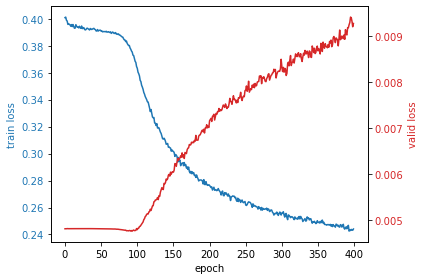

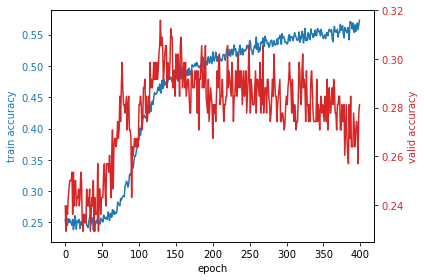

tensor([0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 1, 0, 3, 0, 0, 3, 0, 0, 0,
        0, 3, 0, 3, 1, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 2, 3,
        3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 3, 0,
        0, 3, 0, 0, 0, 3, 0, 1, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 1, 0, 3, 0, 3, 0,
        3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
        0, 3, 2, 0, 2, 3, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 0, 2, 0, 0, 3, 0,
        0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0,
        0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 1, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 0, 2, 3,
        0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 2, 3, 0, 3, 0, 3, 0, 0, 3, 3, 3, 2,
        0, 3, 0, 0, 0, 0, 0, 3, 2, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3],
       device='cuda:0')


In [2]:
from importlib import reload
import utils
print(model.FC1)
reload(utils)
utils.plot_curve(loss_log, 'loss')
utils.plot_curve(accuracy_log, 'accuracy')
print(torch.argmax(model(test_dataset.data.to(device)), dim = 1))

# Test

In [1]:
from dataset.matDataset import SI_dataset
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
import torch

from models import *
from trial import *


model = AttentionNet(
    input_size = (22, 562),
    activate_func = nn.ELU,
    dropout = 0.9,
    kernel_size = 25,
    dense_size = 128,
    filter_number = 32
)


optimizer = optim.Adam(
    model.parameters(),
    lr = 0.00001,
    weight_decay = 0.1
)
 
train_dataset = SI_dataset()
test_dataset = SI_dataset(train = False)

train_loader = DataLoader(train_dataset, batch_size = 128)


device = torch.device('cuda:0')

model, loss_log, accuracy_log = train(model, device, nn.CrossEntropyLoss(), optimizer, 400, train_loader, test_dataset)



Training Epoch 01/400: 100%|██████████| 36/36 [00:11<00:00,  3.20batch/s, accuracy=25.8, loss=0.013] 


current loss: 0.004778222077422672, current accuracy: 0.2916666666666667


Training Epoch 02/400: 100%|██████████| 36/36 [00:03<00:00, 10.34batch/s, accuracy=25, loss=0.0124]  


current loss: 0.004752392984098858, current accuracy: 0.3194444444444444


Training Epoch 03/400: 100%|██████████| 36/36 [00:03<00:00, 10.12batch/s, accuracy=28.9, loss=0.011] 


current loss: 0.0047816091941462625, current accuracy: 0.2708333333333333


Training Epoch 04/400: 100%|██████████| 36/36 [00:03<00:00, 10.18batch/s, accuracy=27.3, loss=0.0121]


current loss: 0.0047287531197071075, current accuracy: 0.2951388888888889


Training Epoch 05/400: 100%|██████████| 36/36 [00:03<00:00, 10.16batch/s, accuracy=33.6, loss=0.0108]


current loss: 0.004884440451860428, current accuracy: 0.2673611111111111


Training Epoch 06/400: 100%|██████████| 36/36 [00:03<00:00, 10.13batch/s, accuracy=39.8, loss=0.00987]


current loss: 0.004874954620997111, current accuracy: 0.2708333333333333


Training Epoch 07/400: 100%|██████████| 36/36 [00:03<00:00, 10.23batch/s, accuracy=41.4, loss=0.0101] 


current loss: 0.00480003696348932, current accuracy: 0.2743055555555556


Training Epoch 08/400: 100%|██████████| 36/36 [00:03<00:00, 10.40batch/s, accuracy=38.3, loss=0.0103]


current loss: 0.004851506402095159, current accuracy: 0.2673611111111111


Training Epoch 09/400: 100%|██████████| 36/36 [00:03<00:00, 10.36batch/s, accuracy=38.3, loss=0.0101]


current loss: 0.004839029163122177, current accuracy: 0.2673611111111111


Training Epoch 10/400: 100%|██████████| 36/36 [00:03<00:00, 10.69batch/s, accuracy=35.9, loss=0.0101] 


current loss: 0.004808548423979018, current accuracy: 0.28125


Training Epoch 11/400: 100%|██████████| 36/36 [00:03<00:00, 11.79batch/s, accuracy=39.8, loss=0.0102] 


current loss: 0.004759237584140565, current accuracy: 0.28125


Training Epoch 12/400: 100%|██████████| 36/36 [00:03<00:00, 11.04batch/s, accuracy=43, loss=0.0101]   


current loss: 0.0047335099014970995, current accuracy: 0.3159722222222222


Training Epoch 13/400: 100%|██████████| 36/36 [00:03<00:00, 11.15batch/s, accuracy=46.1, loss=0.00983]


current loss: 0.0047568463616900975, current accuracy: 0.28125


Training Epoch 14/400: 100%|██████████| 36/36 [00:02<00:00, 12.33batch/s, accuracy=47.7, loss=0.00945]


current loss: 0.0047038694222768145, current accuracy: 0.3333333333333333


Training Epoch 15/400: 100%|██████████| 36/36 [00:02<00:00, 12.38batch/s, accuracy=46.1, loss=0.00943]


current loss: 0.00469979809390174, current accuracy: 0.3229166666666667


Training Epoch 16/400: 100%|██████████| 36/36 [00:02<00:00, 12.43batch/s, accuracy=50, loss=0.00921]  


current loss: 0.004709634929895401, current accuracy: 0.3055555555555556


Training Epoch 17/400: 100%|██████████| 36/36 [00:02<00:00, 12.27batch/s, accuracy=35.2, loss=0.0101] 


current loss: 0.004678018391132355, current accuracy: 0.3298611111111111


Training Epoch 18/400: 100%|██████████| 36/36 [00:02<00:00, 12.29batch/s, accuracy=45.3, loss=0.00977]


current loss: 0.0046644094917509295, current accuracy: 0.3298611111111111


Training Epoch 19/400: 100%|██████████| 36/36 [00:02<00:00, 12.41batch/s, accuracy=51.6, loss=0.00863]


current loss: 0.00465848876370324, current accuracy: 0.3263888888888889


Training Epoch 20/400: 100%|██████████| 36/36 [00:02<00:00, 12.36batch/s, accuracy=46.9, loss=0.00918]


current loss: 0.004669564879602856, current accuracy: 0.3194444444444444


Training Epoch 21/400: 100%|██████████| 36/36 [00:02<00:00, 12.35batch/s, accuracy=49.2, loss=0.00881]


current loss: 0.004651736054155562, current accuracy: 0.3402777777777778


Training Epoch 22/400: 100%|██████████| 36/36 [00:02<00:00, 12.16batch/s, accuracy=48.4, loss=0.00901]


current loss: 0.004683670898278554, current accuracy: 0.3263888888888889


Training Epoch 23/400: 100%|██████████| 36/36 [00:03<00:00, 11.42batch/s, accuracy=40.6, loss=0.00957]


current loss: 0.004631880670785904, current accuracy: 0.34375


Training Epoch 24/400: 100%|██████████| 36/36 [00:03<00:00, 11.40batch/s, accuracy=48.4, loss=0.00913]


current loss: 0.004617990718947517, current accuracy: 0.3506944444444444


Training Epoch 25/400: 100%|██████████| 36/36 [00:02<00:00, 12.16batch/s, accuracy=42.2, loss=0.00974]


current loss: 0.004683389431900448, current accuracy: 0.3263888888888889


Training Epoch 26/400: 100%|██████████| 36/36 [00:03<00:00, 11.27batch/s, accuracy=54.7, loss=0.00877]


current loss: 0.004613635026746326, current accuracy: 0.3645833333333333


Training Epoch 27/400: 100%|██████████| 36/36 [00:03<00:00, 10.87batch/s, accuracy=45.3, loss=0.00862]


current loss: 0.004614476528432634, current accuracy: 0.3402777777777778


Training Epoch 28/400: 100%|██████████| 36/36 [00:03<00:00, 11.00batch/s, accuracy=60.2, loss=0.00797]


current loss: 0.0046018680764569175, current accuracy: 0.3680555555555556


Training Epoch 29/400: 100%|██████████| 36/36 [00:03<00:00, 11.76batch/s, accuracy=53.1, loss=0.00868]


current loss: 0.0046319303413232165, current accuracy: 0.3506944444444444


Training Epoch 30/400: 100%|██████████| 36/36 [00:03<00:00, 10.99batch/s, accuracy=53.9, loss=0.0081] 


current loss: 0.004594117816951539, current accuracy: 0.3472222222222222


Training Epoch 31/400: 100%|██████████| 36/36 [00:03<00:00, 10.87batch/s, accuracy=50.8, loss=0.00852]


current loss: 0.004601096113522847, current accuracy: 0.3298611111111111


Training Epoch 32/400: 100%|██████████| 36/36 [00:03<00:00, 11.83batch/s, accuracy=59.4, loss=0.00802]


current loss: 0.004565655357307858, current accuracy: 0.375


Training Epoch 33/400: 100%|██████████| 36/36 [00:03<00:00, 11.98batch/s, accuracy=51.6, loss=0.00851]


current loss: 0.0046117885245217215, current accuracy: 0.34375


Training Epoch 34/400: 100%|██████████| 36/36 [00:03<00:00, 11.74batch/s, accuracy=53.1, loss=0.00847]


current loss: 0.0045830267998907305, current accuracy: 0.3333333333333333


Training Epoch 35/400: 100%|██████████| 36/36 [00:03<00:00, 11.28batch/s, accuracy=56.2, loss=0.0079] 


current loss: 0.004575027773777644, current accuracy: 0.3472222222222222


Training Epoch 36/400: 100%|██████████| 36/36 [00:03<00:00, 11.45batch/s, accuracy=53.9, loss=0.00817]


current loss: 0.004575773659679625, current accuracy: 0.3506944444444444


Training Epoch 37/400: 100%|██████████| 36/36 [00:03<00:00, 11.93batch/s, accuracy=50, loss=0.00845]  


current loss: 0.004556191464265187, current accuracy: 0.34375


Training Epoch 38/400: 100%|██████████| 36/36 [00:03<00:00, 11.84batch/s, accuracy=59.4, loss=0.0076] 


current loss: 0.004559416323900223, current accuracy: 0.3611111111111111


Training Epoch 39/400: 100%|██████████| 36/36 [00:03<00:00, 11.46batch/s, accuracy=60.2, loss=0.00765]


current loss: 0.004541613989406162, current accuracy: 0.3541666666666667


Training Epoch 40/400: 100%|██████████| 36/36 [00:03<00:00, 11.76batch/s, accuracy=57, loss=0.00793]  


current loss: 0.004566914505428738, current accuracy: 0.3541666666666667


Training Epoch 41/400: 100%|██████████| 36/36 [00:03<00:00, 11.48batch/s, accuracy=60.2, loss=0.00792]


current loss: 0.004556001060538822, current accuracy: 0.3472222222222222


Training Epoch 42/400: 100%|██████████| 36/36 [00:03<00:00, 11.92batch/s, accuracy=60.9, loss=0.00731]


current loss: 0.00452146182457606, current accuracy: 0.3680555555555556


Training Epoch 43/400: 100%|██████████| 36/36 [00:02<00:00, 12.13batch/s, accuracy=60.9, loss=0.00724]


current loss: 0.004610248737865024, current accuracy: 0.3368055555555556


Training Epoch 44/400: 100%|██████████| 36/36 [00:03<00:00, 11.87batch/s, accuracy=63.3, loss=0.00778]


current loss: 0.004548654788070255, current accuracy: 0.3611111111111111


Training Epoch 45/400: 100%|██████████| 36/36 [00:03<00:00, 11.36batch/s, accuracy=58.6, loss=0.00747]


current loss: 0.004578201307190789, current accuracy: 0.3472222222222222


Training Epoch 46/400: 100%|██████████| 36/36 [00:02<00:00, 12.14batch/s, accuracy=57.8, loss=0.00794]


current loss: 0.004555051525433858, current accuracy: 0.3368055555555556


Training Epoch 47/400: 100%|██████████| 36/36 [00:02<00:00, 12.08batch/s, accuracy=64.1, loss=0.00753]


current loss: 0.004569082624382443, current accuracy: 0.3333333333333333


Training Epoch 48/400: 100%|██████████| 36/36 [00:03<00:00, 11.88batch/s, accuracy=63.3, loss=0.00688]


current loss: 0.0045765915678607095, current accuracy: 0.34375


Training Epoch 49/400: 100%|██████████| 36/36 [00:03<00:00, 11.53batch/s, accuracy=68, loss=0.00731]  


current loss: 0.004569727099604077, current accuracy: 0.3333333333333333


Training Epoch 50/400: 100%|██████████| 36/36 [00:03<00:00, 11.96batch/s, accuracy=68, loss=0.0068]   


current loss: 0.004549200336138408, current accuracy: 0.34375


Training Epoch 51/400: 100%|██████████| 36/36 [00:03<00:00, 11.79batch/s, accuracy=67.2, loss=0.00688]


current loss: 0.004512823704216216, current accuracy: 0.3576388888888889


Training Epoch 52/400: 100%|██████████| 36/36 [00:03<00:00, 11.90batch/s, accuracy=65.6, loss=0.00701]


current loss: 0.004541397922568851, current accuracy: 0.3368055555555556


Training Epoch 53/400: 100%|██████████| 36/36 [00:03<00:00, 11.93batch/s, accuracy=57.8, loss=0.00723]


current loss: 0.004528294006983439, current accuracy: 0.3472222222222222


Training Epoch 54/400: 100%|██████████| 36/36 [00:03<00:00, 11.25batch/s, accuracy=68.8, loss=0.00676]


current loss: 0.004564409454663594, current accuracy: 0.3402777777777778


Training Epoch 55/400: 100%|██████████| 36/36 [00:03<00:00, 11.83batch/s, accuracy=64.8, loss=0.00653]


current loss: 0.004572135706742604, current accuracy: 0.3263888888888889


Training Epoch 56/400: 100%|██████████| 36/36 [00:03<00:00, 11.34batch/s, accuracy=64.1, loss=0.00714]


current loss: 0.004541878071096208, current accuracy: 0.3506944444444444


Training Epoch 57/400: 100%|██████████| 36/36 [00:02<00:00, 12.14batch/s, accuracy=62.5, loss=0.00733]


current loss: 0.004503572566641701, current accuracy: 0.3402777777777778


Training Epoch 58/400: 100%|██████████| 36/36 [00:02<00:00, 12.14batch/s, accuracy=66.4, loss=0.00687]


current loss: 0.004566863179206848, current accuracy: 0.3402777777777778


Training Epoch 59/400: 100%|██████████| 36/36 [00:02<00:00, 12.05batch/s, accuracy=60.2, loss=0.0071] 


current loss: 0.004571148504813512, current accuracy: 0.3368055555555556


Training Epoch 60/400: 100%|██████████| 36/36 [00:03<00:00, 11.97batch/s, accuracy=67.2, loss=0.00679]


current loss: 0.004593391799264484, current accuracy: 0.3333333333333333


Training Epoch 61/400: 100%|██████████| 36/36 [00:02<00:00, 12.08batch/s, accuracy=64.8, loss=0.00696]


current loss: 0.0045429252915912205, current accuracy: 0.34375


Training Epoch 62/400: 100%|██████████| 36/36 [00:02<00:00, 12.27batch/s, accuracy=65.6, loss=0.00693]


current loss: 0.004548114620976978, current accuracy: 0.34375


Training Epoch 63/400: 100%|██████████| 36/36 [00:02<00:00, 12.36batch/s, accuracy=64.8, loss=0.00641]


current loss: 0.004564399520556132, current accuracy: 0.3402777777777778


Training Epoch 64/400: 100%|██████████| 36/36 [00:02<00:00, 12.42batch/s, accuracy=63.3, loss=0.00677]


current loss: 0.00455474563770824, current accuracy: 0.3541666666666667


Training Epoch 65/400: 100%|██████████| 36/36 [00:02<00:00, 12.37batch/s, accuracy=68.8, loss=0.00685]


current loss: 0.004587682584921519, current accuracy: 0.3263888888888889


Training Epoch 66/400: 100%|██████████| 36/36 [00:02<00:00, 12.32batch/s, accuracy=64.8, loss=0.00671]


current loss: 0.004551028211911519, current accuracy: 0.3298611111111111


Training Epoch 67/400: 100%|██████████| 36/36 [00:02<00:00, 12.43batch/s, accuracy=64.1, loss=0.007]  


current loss: 0.004492878499958251, current accuracy: 0.3611111111111111


Training Epoch 68/400: 100%|██████████| 36/36 [00:02<00:00, 12.34batch/s, accuracy=70.3, loss=0.00635]


current loss: 0.004553604457113478, current accuracy: 0.3402777777777778


Training Epoch 69/400: 100%|██████████| 36/36 [00:02<00:00, 12.26batch/s, accuracy=64.8, loss=0.00642]


current loss: 0.004570382336775462, current accuracy: 0.34375


Training Epoch 70/400: 100%|██████████| 36/36 [00:02<00:00, 12.40batch/s, accuracy=69.5, loss=0.00605]


current loss: 0.0045539190371831255, current accuracy: 0.3506944444444444


Training Epoch 71/400: 100%|██████████| 36/36 [00:02<00:00, 12.37batch/s, accuracy=65.6, loss=0.00642]


current loss: 0.004584151837560866, current accuracy: 0.34375


Training Epoch 72/400: 100%|██████████| 36/36 [00:03<00:00, 11.99batch/s, accuracy=67.2, loss=0.00612]


current loss: 0.004553729047377904, current accuracy: 0.3611111111111111


Training Epoch 73/400: 100%|██████████| 36/36 [00:03<00:00, 11.72batch/s, accuracy=70.3, loss=0.00618]


current loss: 0.0045230889485941995, current accuracy: 0.3541666666666667


Training Epoch 74/400: 100%|██████████| 36/36 [00:02<00:00, 12.26batch/s, accuracy=75, loss=0.00595]  


current loss: 0.004589909480677711, current accuracy: 0.3506944444444444


Training Epoch 75/400: 100%|██████████| 36/36 [00:03<00:00, 11.92batch/s, accuracy=71.9, loss=0.00627]


current loss: 0.004574285199244817, current accuracy: 0.3472222222222222


Training Epoch 76/400: 100%|██████████| 36/36 [00:02<00:00, 12.20batch/s, accuracy=70.3, loss=0.00618]


current loss: 0.00459840852353308, current accuracy: 0.3298611111111111


Training Epoch 77/400: 100%|██████████| 36/36 [00:03<00:00, 11.77batch/s, accuracy=72.7, loss=0.0058] 


current loss: 0.004574889938036601, current accuracy: 0.3368055555555556


Training Epoch 78/400: 100%|██████████| 36/36 [00:02<00:00, 12.16batch/s, accuracy=69.5, loss=0.00632]


current loss: 0.004551219443480174, current accuracy: 0.3333333333333333


Training Epoch 79/400: 100%|██████████| 36/36 [00:03<00:00, 11.96batch/s, accuracy=72.7, loss=0.0059] 


current loss: 0.0045620716280407375, current accuracy: 0.3576388888888889


Training Epoch 80/400: 100%|██████████| 36/36 [00:03<00:00, 11.98batch/s, accuracy=71.9, loss=0.00605]


current loss: 0.0046288859513070844, current accuracy: 0.3333333333333333


Training Epoch 81/400: 100%|██████████| 36/36 [00:02<00:00, 12.26batch/s, accuracy=72.7, loss=0.00582]


current loss: 0.004647360493739446, current accuracy: 0.3506944444444444


Training Epoch 82/400: 100%|██████████| 36/36 [00:03<00:00, 11.94batch/s, accuracy=74.2, loss=0.0062] 


current loss: 0.0046092164185312055, current accuracy: 0.3333333333333333


Training Epoch 83/400: 100%|██████████| 36/36 [00:03<00:00, 11.94batch/s, accuracy=71.9, loss=0.00589]


current loss: 0.004611058367623223, current accuracy: 0.3506944444444444


Training Epoch 84/400: 100%|██████████| 36/36 [00:03<00:00, 11.25batch/s, accuracy=66.4, loss=0.00616]


current loss: 0.004639485230048497, current accuracy: 0.3506944444444444


Training Epoch 85/400: 100%|██████████| 36/36 [00:03<00:00, 11.60batch/s, accuracy=70.3, loss=0.00623]


current loss: 0.004634855108128654, current accuracy: 0.34375


Training Epoch 86/400: 100%|██████████| 36/36 [00:03<00:00, 11.29batch/s, accuracy=78.9, loss=0.00546]


current loss: 0.004613276571035385, current accuracy: 0.3298611111111111


Training Epoch 87/400: 100%|██████████| 36/36 [00:03<00:00, 11.94batch/s, accuracy=75.8, loss=0.00565]


current loss: 0.004617639713817173, current accuracy: 0.3368055555555556


Training Epoch 88/400: 100%|██████████| 36/36 [00:03<00:00, 11.83batch/s, accuracy=75, loss=0.00582]  


current loss: 0.004604039920700921, current accuracy: 0.3472222222222222


Training Epoch 89/400: 100%|██████████| 36/36 [00:03<00:00, 11.81batch/s, accuracy=74.2, loss=0.00595]


current loss: 0.004592721660931905, current accuracy: 0.3541666666666667


Training Epoch 90/400: 100%|██████████| 36/36 [00:03<00:00, 11.29batch/s, accuracy=80.5, loss=0.0053] 


current loss: 0.00466296739048428, current accuracy: 0.3229166666666667


Training Epoch 91/400: 100%|██████████| 36/36 [00:02<00:00, 12.21batch/s, accuracy=68.8, loss=0.00625]


current loss: 0.004626333713531494, current accuracy: 0.3263888888888889


Training Epoch 92/400: 100%|██████████| 36/36 [00:03<00:00, 11.64batch/s, accuracy=76.6, loss=0.00519]


current loss: 0.004634046720133888, current accuracy: 0.3402777777777778


Training Epoch 93/400: 100%|██████████| 36/36 [00:03<00:00, 11.80batch/s, accuracy=73.4, loss=0.00588]


current loss: 0.004674870520830154, current accuracy: 0.3472222222222222


Training Epoch 94/400: 100%|██████████| 36/36 [00:03<00:00, 11.25batch/s, accuracy=70.3, loss=0.00592]


current loss: 0.004668302420112822, current accuracy: 0.3472222222222222


Training Epoch 95/400: 100%|██████████| 36/36 [00:03<00:00, 10.93batch/s, accuracy=71.1, loss=0.00574]


current loss: 0.004617078022824394, current accuracy: 0.3506944444444444


Training Epoch 96/400: 100%|██████████| 36/36 [00:03<00:00, 11.89batch/s, accuracy=71.9, loss=0.00578]


current loss: 0.004637395756112205, current accuracy: 0.3541666666666667


Training Epoch 97/400: 100%|██████████| 36/36 [00:02<00:00, 12.05batch/s, accuracy=69.5, loss=0.00594]


current loss: 0.0047083037594954176, current accuracy: 0.3263888888888889


Training Epoch 98/400: 100%|██████████| 36/36 [00:03<00:00, 11.92batch/s, accuracy=74.2, loss=0.00566]


current loss: 0.0046956953075197, current accuracy: 0.3402777777777778


Training Epoch 99/400: 100%|██████████| 36/36 [00:03<00:00, 11.60batch/s, accuracy=78.9, loss=0.00561]


current loss: 0.004654584659470452, current accuracy: 0.3506944444444444


Training Epoch 100/400: 100%|██████████| 36/36 [00:03<00:00, 11.78batch/s, accuracy=75.8, loss=0.00546]


current loss: 0.004646178748872545, current accuracy: 0.3402777777777778


Training Epoch 101/400: 100%|██████████| 36/36 [00:03<00:00, 11.93batch/s, accuracy=77.3, loss=0.00525]


current loss: 0.004743651797374089, current accuracy: 0.3263888888888889


Training Epoch 102/400: 100%|██████████| 36/36 [00:03<00:00, 11.65batch/s, accuracy=82, loss=0.00529]  


current loss: 0.004641739858521355, current accuracy: 0.3506944444444444


Training Epoch 103/400: 100%|██████████| 36/36 [00:03<00:00, 11.77batch/s, accuracy=75.8, loss=0.0053] 


current loss: 0.004673925538857778, current accuracy: 0.3402777777777778


Training Epoch 104/400: 100%|██████████| 36/36 [00:03<00:00, 11.79batch/s, accuracy=78.1, loss=0.00541]


current loss: 0.004641857826047474, current accuracy: 0.34375


Training Epoch 105/400: 100%|██████████| 36/36 [00:03<00:00, 11.81batch/s, accuracy=78.9, loss=0.00529]


current loss: 0.004604135950406392, current accuracy: 0.3645833333333333


Training Epoch 106/400: 100%|██████████| 36/36 [00:03<00:00, 11.25batch/s, accuracy=71.9, loss=0.0052] 


current loss: 0.004683651443984773, current accuracy: 0.3298611111111111


Training Epoch 107/400: 100%|██████████| 36/36 [00:02<00:00, 12.14batch/s, accuracy=83.6, loss=0.00507]


current loss: 0.004667263891961839, current accuracy: 0.3576388888888889


Training Epoch 108/400: 100%|██████████| 36/36 [00:02<00:00, 12.35batch/s, accuracy=68.8, loss=0.00571]


current loss: 0.004597692026032342, current accuracy: 0.3645833333333333


Training Epoch 109/400: 100%|██████████| 36/36 [00:02<00:00, 12.32batch/s, accuracy=74.2, loss=0.0052] 


current loss: 0.004693287114302318, current accuracy: 0.3298611111111111


Training Epoch 110/400: 100%|██████████| 36/36 [00:02<00:00, 12.47batch/s, accuracy=75.8, loss=0.00568]


current loss: 0.004647153947088454, current accuracy: 0.3472222222222222


Training Epoch 111/400: 100%|██████████| 36/36 [00:02<00:00, 12.41batch/s, accuracy=83.6, loss=0.00486]


current loss: 0.004732484618822734, current accuracy: 0.3368055555555556


Training Epoch 112/400: 100%|██████████| 36/36 [00:02<00:00, 12.00batch/s, accuracy=83.6, loss=0.00482]


current loss: 0.004700526595115662, current accuracy: 0.3472222222222222


Training Epoch 113/400: 100%|██████████| 36/36 [00:02<00:00, 12.07batch/s, accuracy=79.7, loss=0.00477]


current loss: 0.004688397877746158, current accuracy: 0.34375


Training Epoch 114/400: 100%|██████████| 36/36 [00:03<00:00, 11.96batch/s, accuracy=83.6, loss=0.00479]


current loss: 0.004639147056473626, current accuracy: 0.3541666666666667


Training Epoch 115/400: 100%|██████████| 36/36 [00:03<00:00, 11.01batch/s, accuracy=84.4, loss=0.00476]


current loss: 0.004671938717365265, current accuracy: 0.3402777777777778


Training Epoch 116/400: 100%|██████████| 36/36 [00:03<00:00, 11.29batch/s, accuracy=82, loss=0.00465]  


current loss: 0.004672913501660029, current accuracy: 0.3541666666666667


Training Epoch 117/400: 100%|██████████| 36/36 [00:03<00:00, 11.21batch/s, accuracy=75, loss=0.00523]  


current loss: 0.0047267356680499185, current accuracy: 0.3368055555555556


Training Epoch 118/400: 100%|██████████| 36/36 [00:03<00:00, 11.85batch/s, accuracy=81.2, loss=0.00457]


current loss: 0.004626503421200646, current accuracy: 0.3506944444444444


Training Epoch 119/400: 100%|██████████| 36/36 [00:02<00:00, 12.03batch/s, accuracy=77.3, loss=0.00458]


current loss: 0.004692563994063271, current accuracy: 0.34375


Training Epoch 120/400: 100%|██████████| 36/36 [00:03<00:00, 11.87batch/s, accuracy=78.1, loss=0.0048] 


current loss: 0.004748145739237468, current accuracy: 0.3333333333333333


Training Epoch 121/400: 100%|██████████| 36/36 [00:02<00:00, 12.05batch/s, accuracy=77.3, loss=0.00465]


current loss: 0.004718805352846782, current accuracy: 0.34375


Training Epoch 122/400: 100%|██████████| 36/36 [00:03<00:00, 11.69batch/s, accuracy=75.8, loss=0.00508]


current loss: 0.004797995918326908, current accuracy: 0.3298611111111111


Training Epoch 123/400: 100%|██████████| 36/36 [00:03<00:00, 11.35batch/s, accuracy=79.7, loss=0.00466]


current loss: 0.00467458532916175, current accuracy: 0.3576388888888889


Training Epoch 124/400: 100%|██████████| 36/36 [00:03<00:00, 11.76batch/s, accuracy=80.5, loss=0.00485]


current loss: 0.004733609242571725, current accuracy: 0.34375


Training Epoch 125/400: 100%|██████████| 36/36 [00:03<00:00, 11.74batch/s, accuracy=82.8, loss=0.00462]


current loss: 0.004669299970070521, current accuracy: 0.3506944444444444


Training Epoch 126/400: 100%|██████████| 36/36 [00:02<00:00, 12.34batch/s, accuracy=80.5, loss=0.00495]


current loss: 0.004710802601443397, current accuracy: 0.3472222222222222


Training Epoch 127/400: 100%|██████████| 36/36 [00:03<00:00, 11.96batch/s, accuracy=82.8, loss=0.00436]


current loss: 0.004758727219369676, current accuracy: 0.3506944444444444


Training Epoch 128/400: 100%|██████████| 36/36 [00:02<00:00, 12.05batch/s, accuracy=78.9, loss=0.00484]


current loss: 0.00463246140215132, current accuracy: 0.3576388888888889


Training Epoch 129/400: 100%|██████████| 36/36 [00:03<00:00, 11.30batch/s, accuracy=72.7, loss=0.00526]


current loss: 0.0046738845606644945, current accuracy: 0.3506944444444444


Training Epoch 130/400: 100%|██████████| 36/36 [00:03<00:00, 11.50batch/s, accuracy=83.6, loss=0.00436]


current loss: 0.004710043470064799, current accuracy: 0.3506944444444444


Training Epoch 131/400: 100%|██████████| 36/36 [00:03<00:00, 11.95batch/s, accuracy=78.1, loss=0.00499]


current loss: 0.004725645399755902, current accuracy: 0.3541666666666667


Training Epoch 132/400: 100%|██████████| 36/36 [00:02<00:00, 12.06batch/s, accuracy=82, loss=0.00442]  


current loss: 0.00471627919210328, current accuracy: 0.3368055555555556


Training Epoch 133/400: 100%|██████████| 36/36 [00:03<00:00, 11.87batch/s, accuracy=79.7, loss=0.00434]


current loss: 0.0047338977456092834, current accuracy: 0.34375


Training Epoch 134/400: 100%|██████████| 36/36 [00:03<00:00, 11.99batch/s, accuracy=85.9, loss=0.00453]


current loss: 0.004749906145864063, current accuracy: 0.34375


Training Epoch 135/400: 100%|██████████| 36/36 [00:02<00:00, 12.16batch/s, accuracy=76.6, loss=0.00483]


current loss: 0.0047703757882118225, current accuracy: 0.34375


Training Epoch 136/400: 100%|██████████| 36/36 [00:03<00:00, 11.39batch/s, accuracy=76.6, loss=0.00493]


current loss: 0.004702989012002945, current accuracy: 0.34375


Training Epoch 137/400: 100%|██████████| 36/36 [00:03<00:00, 11.80batch/s, accuracy=84.4, loss=0.00441]


current loss: 0.0047299907439284855, current accuracy: 0.3333333333333333


Training Epoch 138/400: 100%|██████████| 36/36 [00:03<00:00, 11.61batch/s, accuracy=80.5, loss=0.00435]


current loss: 0.004711516615417268, current accuracy: 0.3541666666666667


Training Epoch 139/400: 100%|██████████| 36/36 [00:03<00:00, 11.45batch/s, accuracy=79.7, loss=0.00435]


current loss: 0.004685568726725048, current accuracy: 0.34375


Training Epoch 140/400: 100%|██████████| 36/36 [00:03<00:00, 11.80batch/s, accuracy=80.5, loss=0.0045] 


current loss: 0.004759101818005244, current accuracy: 0.3368055555555556


Training Epoch 141/400: 100%|██████████| 36/36 [00:02<00:00, 12.03batch/s, accuracy=80.5, loss=0.00459]


current loss: 0.00472026194135348, current accuracy: 0.34375


Training Epoch 142/400: 100%|██████████| 36/36 [00:03<00:00, 11.78batch/s, accuracy=82, loss=0.00446]  


current loss: 0.004694589310222202, current accuracy: 0.3472222222222222


Training Epoch 143/400: 100%|██████████| 36/36 [00:03<00:00, 11.38batch/s, accuracy=81.2, loss=0.00443]


current loss: 0.004789536197980245, current accuracy: 0.3368055555555556


Training Epoch 144/400: 100%|██████████| 36/36 [00:02<00:00, 12.01batch/s, accuracy=81.2, loss=0.00441]


current loss: 0.004788248903221554, current accuracy: 0.3368055555555556


Training Epoch 145/400: 100%|██████████| 36/36 [00:03<00:00, 11.86batch/s, accuracy=81.2, loss=0.00433]


current loss: 0.004776062236891853, current accuracy: 0.3402777777777778


Training Epoch 146/400: 100%|██████████| 36/36 [00:02<00:00, 12.08batch/s, accuracy=82, loss=0.00434]  


current loss: 0.004743707676728566, current accuracy: 0.34375


Training Epoch 147/400: 100%|██████████| 36/36 [00:02<00:00, 12.30batch/s, accuracy=82.8, loss=0.00403]


current loss: 0.004859525296423171, current accuracy: 0.3333333333333333


Training Epoch 148/400: 100%|██████████| 36/36 [00:02<00:00, 12.06batch/s, accuracy=79.7, loss=0.00466]


current loss: 0.004721525228685803, current accuracy: 0.3472222222222222


Training Epoch 149/400: 100%|██████████| 36/36 [00:02<00:00, 12.12batch/s, accuracy=79.7, loss=0.00473]


current loss: 0.004705728342135747, current accuracy: 0.3472222222222222


Training Epoch 150/400: 100%|██████████| 36/36 [00:03<00:00, 11.89batch/s, accuracy=85.9, loss=0.00396]


current loss: 0.00473737551106347, current accuracy: 0.3472222222222222


Training Epoch 151/400: 100%|██████████| 36/36 [00:03<00:00, 11.72batch/s, accuracy=76.6, loss=0.00455]


current loss: 0.004801759703291787, current accuracy: 0.3333333333333333


Training Epoch 152/400: 100%|██████████| 36/36 [00:03<00:00, 11.77batch/s, accuracy=80.5, loss=0.00415]


current loss: 0.004838019609451294, current accuracy: 0.3368055555555556


Training Epoch 153/400: 100%|██████████| 36/36 [00:03<00:00, 11.01batch/s, accuracy=84.4, loss=0.00408]


current loss: 0.004800962491167916, current accuracy: 0.3541666666666667


Training Epoch 154/400: 100%|██████████| 36/36 [00:03<00:00, 11.67batch/s, accuracy=80.5, loss=0.00411]


current loss: 0.004824149525827832, current accuracy: 0.3368055555555556


Training Epoch 155/400: 100%|██████████| 36/36 [00:02<00:00, 12.00batch/s, accuracy=86.7, loss=0.00415]


current loss: 0.004737573365370433, current accuracy: 0.3680555555555556


Training Epoch 156/400: 100%|██████████| 36/36 [00:03<00:00, 11.87batch/s, accuracy=82, loss=0.00445]  


current loss: 0.004734239644474453, current accuracy: 0.3472222222222222


Training Epoch 157/400: 100%|██████████| 36/36 [00:02<00:00, 12.01batch/s, accuracy=83.6, loss=0.00436]


current loss: 0.004829298290941451, current accuracy: 0.3263888888888889


Training Epoch 158/400: 100%|██████████| 36/36 [00:03<00:00, 11.75batch/s, accuracy=86.7, loss=0.00363]


current loss: 0.004858372526036369, current accuracy: 0.3263888888888889


Training Epoch 159/400: 100%|██████████| 36/36 [00:02<00:00, 12.00batch/s, accuracy=85.9, loss=0.00367]


current loss: 0.00487835125790702, current accuracy: 0.3333333333333333


Training Epoch 160/400: 100%|██████████| 36/36 [00:02<00:00, 12.30batch/s, accuracy=79.7, loss=0.0043] 


current loss: 0.004835675574011273, current accuracy: 0.34375


Training Epoch 161/400: 100%|██████████| 36/36 [00:02<00:00, 12.27batch/s, accuracy=79.7, loss=0.00427]


current loss: 0.004838125159343083, current accuracy: 0.3402777777777778


Training Epoch 162/400: 100%|██████████| 36/36 [00:02<00:00, 12.30batch/s, accuracy=87.5, loss=0.00397]


current loss: 0.004802486134899987, current accuracy: 0.3576388888888889


Training Epoch 163/400: 100%|██████████| 36/36 [00:02<00:00, 12.32batch/s, accuracy=88.3, loss=0.00416]


current loss: 0.004832060800658332, current accuracy: 0.3333333333333333


Training Epoch 164/400: 100%|██████████| 36/36 [00:02<00:00, 12.24batch/s, accuracy=82.8, loss=0.00379]


current loss: 0.004904153032435311, current accuracy: 0.3368055555555556


Training Epoch 165/400: 100%|██████████| 36/36 [00:02<00:00, 12.30batch/s, accuracy=85.2, loss=0.0036] 


current loss: 0.004888056053055657, current accuracy: 0.3402777777777778


Training Epoch 166/400: 100%|██████████| 36/36 [00:02<00:00, 12.12batch/s, accuracy=85.2, loss=0.00402]


current loss: 0.004881079826090071, current accuracy: 0.3402777777777778


Training Epoch 167/400: 100%|██████████| 36/36 [00:03<00:00, 11.95batch/s, accuracy=87.5, loss=0.00358]


current loss: 0.004836805164813995, current accuracy: 0.3402777777777778


Training Epoch 168/400: 100%|██████████| 36/36 [00:03<00:00, 11.51batch/s, accuracy=83.6, loss=0.00422]


current loss: 0.004821438756253984, current accuracy: 0.3368055555555556


Training Epoch 169/400: 100%|██████████| 36/36 [00:03<00:00, 11.89batch/s, accuracy=82, loss=0.00427]  


current loss: 0.004835713240835402, current accuracy: 0.3541666666666667


Training Epoch 170/400: 100%|██████████| 36/36 [00:03<00:00, 11.10batch/s, accuracy=85.9, loss=0.00377]


current loss: 0.004844945751958423, current accuracy: 0.34375


Training Epoch 171/400: 100%|██████████| 36/36 [00:02<00:00, 12.14batch/s, accuracy=87.5, loss=0.00381]


current loss: 0.004938159965806537, current accuracy: 0.3333333333333333


Training Epoch 172/400: 100%|██████████| 36/36 [00:02<00:00, 12.43batch/s, accuracy=85.2, loss=0.00395]


current loss: 0.004881575703620911, current accuracy: 0.3611111111111111


Training Epoch 173/400: 100%|██████████| 36/36 [00:02<00:00, 12.28batch/s, accuracy=84.4, loss=0.0038] 


current loss: 0.004973530355427001, current accuracy: 0.3402777777777778


Training Epoch 174/400: 100%|██████████| 36/36 [00:03<00:00, 11.82batch/s, accuracy=85.9, loss=0.00383]


current loss: 0.004842016018099255, current accuracy: 0.3333333333333333


Training Epoch 175/400: 100%|██████████| 36/36 [00:03<00:00, 11.27batch/s, accuracy=90.6, loss=0.00335]


current loss: 0.004917308688163757, current accuracy: 0.3402777777777778


Training Epoch 176/400: 100%|██████████| 36/36 [00:03<00:00, 11.20batch/s, accuracy=86.7, loss=0.0041] 


current loss: 0.004991088476445939, current accuracy: 0.3368055555555556


Training Epoch 177/400: 100%|██████████| 36/36 [00:03<00:00, 11.64batch/s, accuracy=81.2, loss=0.00385]


current loss: 0.0049490779638290405, current accuracy: 0.3368055555555556


Training Epoch 178/400: 100%|██████████| 36/36 [00:03<00:00, 11.29batch/s, accuracy=88.3, loss=0.00375]


current loss: 0.005004763603210449, current accuracy: 0.3402777777777778


Training Epoch 179/400: 100%|██████████| 36/36 [00:03<00:00, 11.67batch/s, accuracy=82, loss=0.0041]   


current loss: 0.004948599884907405, current accuracy: 0.3368055555555556


Training Epoch 180/400: 100%|██████████| 36/36 [00:03<00:00, 10.75batch/s, accuracy=87.5, loss=0.00353]


current loss: 0.00500721029109425, current accuracy: 0.3333333333333333


Training Epoch 181/400: 100%|██████████| 36/36 [00:03<00:00, 11.08batch/s, accuracy=85.9, loss=0.0039] 


current loss: 0.004940499862035115, current accuracy: 0.3298611111111111


Training Epoch 182/400: 100%|██████████| 36/36 [00:03<00:00, 11.65batch/s, accuracy=83.6, loss=0.004]  


current loss: 0.0049125005801518755, current accuracy: 0.3576388888888889


Training Epoch 183/400: 100%|██████████| 36/36 [00:03<00:00, 11.12batch/s, accuracy=85.2, loss=0.0038] 


current loss: 0.004898105644517475, current accuracy: 0.3506944444444444


Training Epoch 184/400: 100%|██████████| 36/36 [00:03<00:00, 10.86batch/s, accuracy=85.9, loss=0.00333]


current loss: 0.004919259084595574, current accuracy: 0.3645833333333333


Training Epoch 185/400: 100%|██████████| 36/36 [00:03<00:00, 11.73batch/s, accuracy=85.9, loss=0.00368]


current loss: 0.004904246578613917, current accuracy: 0.3541666666666667


Training Epoch 186/400: 100%|██████████| 36/36 [00:03<00:00, 11.66batch/s, accuracy=89.1, loss=0.00363]


current loss: 0.004983164783981111, current accuracy: 0.3368055555555556


Training Epoch 187/400: 100%|██████████| 36/36 [00:03<00:00, 11.88batch/s, accuracy=92.2, loss=0.00336]


current loss: 0.004930357552236981, current accuracy: 0.3506944444444444


Training Epoch 188/400: 100%|██████████| 36/36 [00:03<00:00, 11.91batch/s, accuracy=85.2, loss=0.00389]


current loss: 0.004893346379200618, current accuracy: 0.3402777777777778


Training Epoch 189/400: 100%|██████████| 36/36 [00:02<00:00, 12.01batch/s, accuracy=85.2, loss=0.00351]


current loss: 0.004927754816081788, current accuracy: 0.3472222222222222


Training Epoch 190/400: 100%|██████████| 36/36 [00:03<00:00, 11.45batch/s, accuracy=82.8, loss=0.0039] 


current loss: 0.004928167909383774, current accuracy: 0.3472222222222222


Training Epoch 191/400: 100%|██████████| 36/36 [00:03<00:00, 11.34batch/s, accuracy=89.1, loss=0.00355]


current loss: 0.00493492517206404, current accuracy: 0.3506944444444444


Training Epoch 192/400: 100%|██████████| 36/36 [00:03<00:00, 11.78batch/s, accuracy=87.5, loss=0.00343]


current loss: 0.004939360337124931, current accuracy: 0.3472222222222222


Training Epoch 193/400: 100%|██████████| 36/36 [00:03<00:00, 11.83batch/s, accuracy=89.1, loss=0.00329]


current loss: 0.004895764506525463, current accuracy: 0.3541666666666667


Training Epoch 194/400: 100%|██████████| 36/36 [00:03<00:00, 11.43batch/s, accuracy=89.1, loss=0.00356]


current loss: 0.004980113771226671, current accuracy: 0.3368055555555556


Training Epoch 195/400: 100%|██████████| 36/36 [00:03<00:00, 11.70batch/s, accuracy=85.9, loss=0.00372]


current loss: 0.004970458646615346, current accuracy: 0.3472222222222222


Training Epoch 196/400: 100%|██████████| 36/36 [00:03<00:00, 11.12batch/s, accuracy=87.5, loss=0.00379]


current loss: 0.0049162184198697405, current accuracy: 0.3472222222222222


Training Epoch 197/400: 100%|██████████| 36/36 [00:03<00:00, 10.86batch/s, accuracy=86.7, loss=0.00348]


current loss: 0.004992208547062344, current accuracy: 0.3333333333333333


Training Epoch 198/400: 100%|██████████| 36/36 [00:03<00:00, 11.50batch/s, accuracy=84.4, loss=0.00384]


current loss: 0.004997553096877204, current accuracy: 0.3576388888888889


Training Epoch 199/400: 100%|██████████| 36/36 [00:03<00:00, 11.78batch/s, accuracy=93, loss=0.0029]   


current loss: 0.005048342463043001, current accuracy: 0.3402777777777778


Training Epoch 200/400: 100%|██████████| 36/36 [00:03<00:00, 11.85batch/s, accuracy=90.6, loss=0.00353]


current loss: 0.004959047668510013, current accuracy: 0.3402777777777778


Training Epoch 201/400: 100%|██████████| 36/36 [00:03<00:00, 11.82batch/s, accuracy=90.6, loss=0.00321]


current loss: 0.004904516869121128, current accuracy: 0.3541666666666667


Training Epoch 202/400: 100%|██████████| 36/36 [00:03<00:00, 11.70batch/s, accuracy=85.9, loss=0.00311]


current loss: 0.005013586746321784, current accuracy: 0.34375


Training Epoch 203/400: 100%|██████████| 36/36 [00:02<00:00, 12.41batch/s, accuracy=89.8, loss=0.0035] 


current loss: 0.005020764552884632, current accuracy: 0.3333333333333333


Training Epoch 204/400: 100%|██████████| 36/36 [00:02<00:00, 12.39batch/s, accuracy=90.6, loss=0.00306]


current loss: 0.005047544836997986, current accuracy: 0.3333333333333333


Training Epoch 205/400: 100%|██████████| 36/36 [00:02<00:00, 12.36batch/s, accuracy=91.4, loss=0.00304]


current loss: 0.004983237220181359, current accuracy: 0.3506944444444444


Training Epoch 206/400: 100%|██████████| 36/36 [00:02<00:00, 12.24batch/s, accuracy=89.8, loss=0.00314]


current loss: 0.004965418328841527, current accuracy: 0.3541666666666667


Training Epoch 207/400: 100%|██████████| 36/36 [00:03<00:00, 11.82batch/s, accuracy=89.8, loss=0.00331]


current loss: 0.004986334178182814, current accuracy: 0.3506944444444444


Training Epoch 208/400: 100%|██████████| 36/36 [00:03<00:00, 11.46batch/s, accuracy=89.1, loss=0.00302]


current loss: 0.005018665972683165, current accuracy: 0.3368055555555556


Training Epoch 209/400: 100%|██████████| 36/36 [00:03<00:00, 11.63batch/s, accuracy=90.6, loss=0.00314]


current loss: 0.005028617878754933, current accuracy: 0.34375


Training Epoch 210/400: 100%|██████████| 36/36 [00:03<00:00, 11.84batch/s, accuracy=87.5, loss=0.00308]


current loss: 0.004999475346671211, current accuracy: 0.3402777777777778


Training Epoch 211/400: 100%|██████████| 36/36 [00:02<00:00, 12.16batch/s, accuracy=86.7, loss=0.00366]


current loss: 0.005008954140875075, current accuracy: 0.3402777777777778


Training Epoch 212/400: 100%|██████████| 36/36 [00:02<00:00, 12.21batch/s, accuracy=83.6, loss=0.00381]


current loss: 0.005015394753879971, current accuracy: 0.3333333333333333


Training Epoch 213/400: 100%|██████████| 36/36 [00:03<00:00, 12.00batch/s, accuracy=87.5, loss=0.00333]


current loss: 0.005000229924917221, current accuracy: 0.3541666666666667


Training Epoch 214/400: 100%|██████████| 36/36 [00:03<00:00, 10.98batch/s, accuracy=91.4, loss=0.00325]


current loss: 0.004995533161693149, current accuracy: 0.3506944444444444


Training Epoch 215/400: 100%|██████████| 36/36 [00:03<00:00, 11.32batch/s, accuracy=86.7, loss=0.00308]


current loss: 0.005043554637167189, current accuracy: 0.3402777777777778


Training Epoch 216/400: 100%|██████████| 36/36 [00:03<00:00, 11.37batch/s, accuracy=91.4, loss=0.00308]


current loss: 0.005088196446498235, current accuracy: 0.3298611111111111


Training Epoch 217/400: 100%|██████████| 36/36 [00:02<00:00, 12.20batch/s, accuracy=88.3, loss=0.00326]


current loss: 0.005021313826243083, current accuracy: 0.3472222222222222


Training Epoch 218/400: 100%|██████████| 36/36 [00:03<00:00, 11.28batch/s, accuracy=88.3, loss=0.00329]


current loss: 0.004991728812456131, current accuracy: 0.3333333333333333


Training Epoch 219/400: 100%|██████████| 36/36 [00:02<00:00, 12.18batch/s, accuracy=90.6, loss=0.00279]


current loss: 0.005020989312065972, current accuracy: 0.3472222222222222


Training Epoch 220/400: 100%|██████████| 36/36 [00:03<00:00, 11.62batch/s, accuracy=90.6, loss=0.00311]


current loss: 0.005077041685581207, current accuracy: 0.3298611111111111


Training Epoch 221/400: 100%|██████████| 36/36 [00:03<00:00, 11.44batch/s, accuracy=92.2, loss=0.0028] 


current loss: 0.004944482611285316, current accuracy: 0.3576388888888889


Training Epoch 222/400: 100%|██████████| 36/36 [00:03<00:00, 11.39batch/s, accuracy=88.3, loss=0.00309]


current loss: 0.004991114139556885, current accuracy: 0.34375


Training Epoch 223/400: 100%|██████████| 36/36 [00:03<00:00, 10.75batch/s, accuracy=85.9, loss=0.00359]


current loss: 0.004991941154003143, current accuracy: 0.3541666666666667


Training Epoch 224/400: 100%|██████████| 36/36 [00:03<00:00, 10.95batch/s, accuracy=94.5, loss=0.0031] 


current loss: 0.005014567739433712, current accuracy: 0.3402777777777778


Training Epoch 225/400: 100%|██████████| 36/36 [00:03<00:00, 10.58batch/s, accuracy=94.5, loss=0.00281]


current loss: 0.005052298721339967, current accuracy: 0.3402777777777778


Training Epoch 226/400: 100%|██████████| 36/36 [00:03<00:00, 10.77batch/s, accuracy=88.3, loss=0.0031] 


current loss: 0.005042398969332377, current accuracy: 0.3541666666666667


Training Epoch 227/400: 100%|██████████| 36/36 [00:03<00:00, 11.13batch/s, accuracy=92.2, loss=0.003]  


current loss: 0.005080255369345347, current accuracy: 0.3541666666666667


Training Epoch 228/400: 100%|██████████| 36/36 [00:03<00:00, 11.13batch/s, accuracy=84.4, loss=0.00349]


current loss: 0.005088261018196742, current accuracy: 0.34375


Training Epoch 229/400: 100%|██████████| 36/36 [00:03<00:00, 10.59batch/s, accuracy=89.8, loss=0.00315]


current loss: 0.005071388764513863, current accuracy: 0.3402777777777778


Training Epoch 230/400: 100%|██████████| 36/36 [00:03<00:00, 10.54batch/s, accuracy=89.8, loss=0.00309]


current loss: 0.005044269892904494, current accuracy: 0.34375


Training Epoch 231/400: 100%|██████████| 36/36 [00:03<00:00, 10.11batch/s, accuracy=93.8, loss=0.00269]


current loss: 0.005021529479159249, current accuracy: 0.3680555555555556


Training Epoch 232/400: 100%|██████████| 36/36 [00:03<00:00, 10.46batch/s, accuracy=88.3, loss=0.00294]


current loss: 0.005113523867395189, current accuracy: 0.3472222222222222


Training Epoch 233/400: 100%|██████████| 36/36 [00:03<00:00, 10.56batch/s, accuracy=86.7, loss=0.00305]


current loss: 0.00512654541267289, current accuracy: 0.3506944444444444


Training Epoch 234/400: 100%|██████████| 36/36 [00:03<00:00, 10.60batch/s, accuracy=85.2, loss=0.00363]


current loss: 0.005045002119408714, current accuracy: 0.3645833333333333


Training Epoch 235/400: 100%|██████████| 36/36 [00:03<00:00, 10.56batch/s, accuracy=89.8, loss=0.00295]


current loss: 0.005008897847599453, current accuracy: 0.3680555555555556


Training Epoch 236/400: 100%|██████████| 36/36 [00:03<00:00, 10.43batch/s, accuracy=93, loss=0.00287]  


current loss: 0.005208572165833579, current accuracy: 0.3333333333333333


Training Epoch 237/400: 100%|██████████| 36/36 [00:03<00:00, 10.52batch/s, accuracy=90.6, loss=0.00281]


current loss: 0.005011860695150163, current accuracy: 0.3645833333333333


Training Epoch 238/400: 100%|██████████| 36/36 [00:03<00:00, 10.46batch/s, accuracy=91.4, loss=0.00285]


current loss: 0.005033382111125522, current accuracy: 0.3645833333333333


Training Epoch 239/400: 100%|██████████| 36/36 [00:03<00:00, 10.44batch/s, accuracy=94.5, loss=0.00274]


current loss: 0.0050805554621749455, current accuracy: 0.3506944444444444


Training Epoch 240/400: 100%|██████████| 36/36 [00:03<00:00, 10.45batch/s, accuracy=91.4, loss=0.00286]


current loss: 0.005116373714473512, current accuracy: 0.3611111111111111


Training Epoch 241/400: 100%|██████████| 36/36 [00:03<00:00, 10.52batch/s, accuracy=89.8, loss=0.00297]


current loss: 0.0050893475612004595, current accuracy: 0.3506944444444444


Training Epoch 242/400: 100%|██████████| 36/36 [00:03<00:00, 10.62batch/s, accuracy=91.4, loss=0.00271]


current loss: 0.0050821151170465685, current accuracy: 0.3506944444444444


Training Epoch 243/400: 100%|██████████| 36/36 [00:03<00:00, 10.61batch/s, accuracy=92.2, loss=0.00286]


current loss: 0.0050535015761852264, current accuracy: 0.3611111111111111


Training Epoch 244/400: 100%|██████████| 36/36 [00:03<00:00, 10.62batch/s, accuracy=91.4, loss=0.00283]


current loss: 0.005129293849070867, current accuracy: 0.3506944444444444


Training Epoch 245/400: 100%|██████████| 36/36 [00:03<00:00, 10.48batch/s, accuracy=93.8, loss=0.00243]


current loss: 0.005137136826912562, current accuracy: 0.3472222222222222


Training Epoch 246/400: 100%|██████████| 36/36 [00:03<00:00, 10.55batch/s, accuracy=91.4, loss=0.0028] 


current loss: 0.005170928521288766, current accuracy: 0.3506944444444444


Training Epoch 247/400: 100%|██████████| 36/36 [00:03<00:00, 10.42batch/s, accuracy=92.2, loss=0.00308]


current loss: 0.005070133341683282, current accuracy: 0.3472222222222222


Training Epoch 248/400: 100%|██████████| 36/36 [00:03<00:00, 10.62batch/s, accuracy=90.6, loss=0.00273]


current loss: 0.0052098847097820705, current accuracy: 0.3472222222222222


Training Epoch 249/400: 100%|██████████| 36/36 [00:03<00:00, 10.28batch/s, accuracy=93, loss=0.00273]  


current loss: 0.0051156145830949145, current accuracy: 0.3611111111111111


Training Epoch 250/400: 100%|██████████| 36/36 [00:03<00:00, 10.20batch/s, accuracy=89.8, loss=0.00298]


current loss: 0.005149203456110424, current accuracy: 0.3541666666666667


Training Epoch 251/400: 100%|██████████| 36/36 [00:03<00:00, 10.75batch/s, accuracy=91.4, loss=0.00275]


current loss: 0.0052833399838871425, current accuracy: 0.3368055555555556


Training Epoch 252/400: 100%|██████████| 36/36 [00:03<00:00, 10.78batch/s, accuracy=89.8, loss=0.0028] 


current loss: 0.00512637197971344, current accuracy: 0.3541666666666667


Training Epoch 253/400: 100%|██████████| 36/36 [00:03<00:00, 10.55batch/s, accuracy=93.8, loss=0.0025] 


current loss: 0.005146726138061947, current accuracy: 0.3506944444444444


Training Epoch 254/400: 100%|██████████| 36/36 [00:03<00:00, 10.61batch/s, accuracy=87.5, loss=0.00286]


current loss: 0.005189598848422368, current accuracy: 0.3472222222222222


Training Epoch 255/400: 100%|██████████| 36/36 [00:03<00:00, 10.67batch/s, accuracy=89.8, loss=0.00251]


current loss: 0.005186355362335841, current accuracy: 0.3506944444444444


Training Epoch 256/400: 100%|██████████| 36/36 [00:03<00:00, 10.59batch/s, accuracy=91.4, loss=0.00262]


current loss: 0.005182460778289371, current accuracy: 0.3541666666666667


Training Epoch 257/400: 100%|██████████| 36/36 [00:03<00:00, 10.52batch/s, accuracy=89.1, loss=0.00271]


current loss: 0.005108213673035304, current accuracy: 0.3541666666666667


Training Epoch 258/400: 100%|██████████| 36/36 [00:03<00:00, 10.53batch/s, accuracy=89.8, loss=0.00302]


current loss: 0.005104103436072667, current accuracy: 0.3611111111111111


Training Epoch 259/400: 100%|██████████| 36/36 [00:03<00:00, 10.55batch/s, accuracy=93, loss=0.00253]  


current loss: 0.005257395820485221, current accuracy: 0.3402777777777778


Training Epoch 260/400: 100%|██████████| 36/36 [00:03<00:00, 10.72batch/s, accuracy=89.8, loss=0.00281]


current loss: 0.00510901047123803, current accuracy: 0.3611111111111111


Training Epoch 261/400: 100%|██████████| 36/36 [00:03<00:00, 10.46batch/s, accuracy=91.4, loss=0.00247]


current loss: 0.005274008959531784, current accuracy: 0.3402777777777778


Training Epoch 262/400: 100%|██████████| 36/36 [00:03<00:00, 10.24batch/s, accuracy=89.1, loss=0.00289]


current loss: 0.005211186905701955, current accuracy: 0.3472222222222222


Training Epoch 263/400: 100%|██████████| 36/36 [00:03<00:00, 10.54batch/s, accuracy=93.8, loss=0.00263]


current loss: 0.005226885279019673, current accuracy: 0.3541666666666667


Training Epoch 264/400: 100%|██████████| 36/36 [00:03<00:00, 10.27batch/s, accuracy=89.8, loss=0.00266]


current loss: 0.005256214903460609, current accuracy: 0.3402777777777778


Training Epoch 265/400: 100%|██████████| 36/36 [00:03<00:00, 10.06batch/s, accuracy=90.6, loss=0.0028] 


current loss: 0.005199941909975476, current accuracy: 0.3368055555555556


Training Epoch 266/400: 100%|██████████| 36/36 [00:03<00:00, 10.54batch/s, accuracy=93, loss=0.00249]  


current loss: 0.005223129358556535, current accuracy: 0.3472222222222222


Training Epoch 267/400: 100%|██████████| 36/36 [00:03<00:00, 10.66batch/s, accuracy=90.6, loss=0.00281]


current loss: 0.005276092638572057, current accuracy: 0.3472222222222222


Training Epoch 268/400: 100%|██████████| 36/36 [00:03<00:00, 10.54batch/s, accuracy=92.2, loss=0.00259]


current loss: 0.0053195709155665506, current accuracy: 0.3402777777777778


Training Epoch 269/400: 100%|██████████| 36/36 [00:03<00:00, 11.09batch/s, accuracy=89.8, loss=0.00291]


current loss: 0.005289222217268414, current accuracy: 0.3298611111111111


Training Epoch 270/400: 100%|██████████| 36/36 [00:03<00:00, 10.82batch/s, accuracy=89.8, loss=0.00287]


current loss: 0.005310222506523132, current accuracy: 0.3229166666666667


Training Epoch 271/400: 100%|██████████| 36/36 [00:03<00:00, 10.61batch/s, accuracy=90.6, loss=0.00279]


current loss: 0.005315330707364612, current accuracy: 0.3229166666666667


Training Epoch 272/400: 100%|██████████| 36/36 [00:03<00:00, 10.59batch/s, accuracy=92.2, loss=0.00284]


current loss: 0.005388541767994563, current accuracy: 0.3333333333333333


Training Epoch 273/400: 100%|██████████| 36/36 [00:03<00:00, 10.61batch/s, accuracy=90.6, loss=0.00252]


current loss: 0.005281094047758315, current accuracy: 0.34375


Training Epoch 274/400: 100%|██████████| 36/36 [00:03<00:00, 10.36batch/s, accuracy=91.4, loss=0.00251]


current loss: 0.005381658673286438, current accuracy: 0.3194444444444444


Training Epoch 275/400: 100%|██████████| 36/36 [00:03<00:00, 10.60batch/s, accuracy=91.4, loss=0.00273]


current loss: 0.00534602047668563, current accuracy: 0.3402777777777778


Training Epoch 276/400: 100%|██████████| 36/36 [00:03<00:00, 10.59batch/s, accuracy=89.8, loss=0.00262]


current loss: 0.005385872804456287, current accuracy: 0.3263888888888889


Training Epoch 277/400: 100%|██████████| 36/36 [00:03<00:00, 10.46batch/s, accuracy=91.4, loss=0.00249]


current loss: 0.005370642575952742, current accuracy: 0.3263888888888889


Training Epoch 278/400: 100%|██████████| 36/36 [00:03<00:00, 10.43batch/s, accuracy=94.5, loss=0.0023] 


current loss: 0.005391172236866421, current accuracy: 0.3472222222222222


Training Epoch 279/400: 100%|██████████| 36/36 [00:03<00:00, 10.48batch/s, accuracy=89.1, loss=0.00287]


current loss: 0.0053596289621459115, current accuracy: 0.3472222222222222


Training Epoch 280/400: 100%|██████████| 36/36 [00:03<00:00, 10.47batch/s, accuracy=94.5, loss=0.00225]


current loss: 0.005472405917114682, current accuracy: 0.3229166666666667


Training Epoch 281/400: 100%|██████████| 36/36 [00:03<00:00, 10.07batch/s, accuracy=93, loss=0.00247]  


current loss: 0.005430123872227139, current accuracy: 0.3298611111111111


Training Epoch 282/400: 100%|██████████| 36/36 [00:03<00:00, 10.07batch/s, accuracy=97.7, loss=0.00223]


current loss: 0.005387162168820699, current accuracy: 0.3402777777777778


Training Epoch 283/400: 100%|██████████| 36/36 [00:03<00:00, 10.33batch/s, accuracy=91.4, loss=0.0027] 


current loss: 0.005485453953345616, current accuracy: 0.3263888888888889


Training Epoch 284/400: 100%|██████████| 36/36 [00:03<00:00, 10.41batch/s, accuracy=93, loss=0.00234]  


current loss: 0.00548545519510905, current accuracy: 0.3298611111111111


Training Epoch 285/400: 100%|██████████| 36/36 [00:03<00:00, 10.86batch/s, accuracy=90.6, loss=0.00269]


current loss: 0.005327240460448795, current accuracy: 0.3506944444444444


Training Epoch 286/400: 100%|██████████| 36/36 [00:03<00:00, 10.45batch/s, accuracy=93.8, loss=0.00249]


current loss: 0.005457097043593724, current accuracy: 0.3506944444444444


Training Epoch 287/400: 100%|██████████| 36/36 [00:03<00:00, 10.75batch/s, accuracy=91.4, loss=0.00246]


current loss: 0.005527053442266252, current accuracy: 0.3333333333333333


Training Epoch 288/400: 100%|██████████| 36/36 [00:03<00:00, 10.94batch/s, accuracy=94.5, loss=0.00236]


current loss: 0.005508042871952057, current accuracy: 0.3333333333333333


Training Epoch 289/400: 100%|██████████| 36/36 [00:03<00:00, 10.41batch/s, accuracy=89.8, loss=0.0027] 


current loss: 0.005554790298144023, current accuracy: 0.3402777777777778


Training Epoch 290/400: 100%|██████████| 36/36 [00:03<00:00, 10.38batch/s, accuracy=92.2, loss=0.00242]


current loss: 0.0054902583360672, current accuracy: 0.3333333333333333


Training Epoch 291/400: 100%|██████████| 36/36 [00:03<00:00, 10.44batch/s, accuracy=92.2, loss=0.0025] 


current loss: 0.005547545436355803, current accuracy: 0.3402777777777778


Training Epoch 292/400: 100%|██████████| 36/36 [00:03<00:00, 10.75batch/s, accuracy=92.2, loss=0.00241]


current loss: 0.005552584512366189, current accuracy: 0.3368055555555556


Training Epoch 293/400: 100%|██████████| 36/36 [00:03<00:00, 10.55batch/s, accuracy=93, loss=0.00201]  


current loss: 0.005584936589002609, current accuracy: 0.3229166666666667


Training Epoch 294/400: 100%|██████████| 36/36 [00:03<00:00, 10.24batch/s, accuracy=94.5, loss=0.00235]


current loss: 0.005555495619773865, current accuracy: 0.3368055555555556


Training Epoch 295/400: 100%|██████████| 36/36 [00:03<00:00, 10.21batch/s, accuracy=93, loss=0.00225]  


current loss: 0.005603647480408351, current accuracy: 0.3333333333333333


Training Epoch 296/400: 100%|██████████| 36/36 [00:03<00:00, 10.39batch/s, accuracy=95.3, loss=0.00226]


current loss: 0.005629713336626689, current accuracy: 0.3298611111111111


Training Epoch 297/400: 100%|██████████| 36/36 [00:03<00:00, 10.47batch/s, accuracy=95.3, loss=0.00169]


current loss: 0.0056376395126183825, current accuracy: 0.3229166666666667


Training Epoch 298/400: 100%|██████████| 36/36 [00:03<00:00, 10.25batch/s, accuracy=93, loss=0.0023]   


current loss: 0.005557480785581801, current accuracy: 0.3298611111111111


Training Epoch 299/400: 100%|██████████| 36/36 [00:03<00:00, 10.20batch/s, accuracy=98.4, loss=0.00202]


current loss: 0.0057172150247626835, current accuracy: 0.3333333333333333


Training Epoch 300/400: 100%|██████████| 36/36 [00:03<00:00, 10.28batch/s, accuracy=89.1, loss=0.00247]


current loss: 0.005617411600218879, current accuracy: 0.3263888888888889


Training Epoch 301/400: 100%|██████████| 36/36 [00:03<00:00, 10.51batch/s, accuracy=89.1, loss=0.00268]


current loss: 0.00564525028069814, current accuracy: 0.3263888888888889


Training Epoch 302/400: 100%|██████████| 36/36 [00:03<00:00, 10.71batch/s, accuracy=93.8, loss=0.00215]


current loss: 0.005789991882112291, current accuracy: 0.3194444444444444


Training Epoch 303/400: 100%|██████████| 36/36 [00:03<00:00, 10.46batch/s, accuracy=91.4, loss=0.00251]


current loss: 0.005525469366047118, current accuracy: 0.3368055555555556


Training Epoch 304/400: 100%|██████████| 36/36 [00:03<00:00, 10.29batch/s, accuracy=89.1, loss=0.00263]


current loss: 0.005727599478430218, current accuracy: 0.3263888888888889


Training Epoch 305/400: 100%|██████████| 36/36 [00:03<00:00, 10.71batch/s, accuracy=91.4, loss=0.00241]


current loss: 0.005604027460018794, current accuracy: 0.3333333333333333


Training Epoch 306/400: 100%|██████████| 36/36 [00:03<00:00, 10.26batch/s, accuracy=95.3, loss=0.00228]


current loss: 0.0056637802885638345, current accuracy: 0.3298611111111111


Training Epoch 307/400: 100%|██████████| 36/36 [00:03<00:00, 10.61batch/s, accuracy=95.3, loss=0.00191]


current loss: 0.005651126719183392, current accuracy: 0.3229166666666667


Training Epoch 308/400: 100%|██████████| 36/36 [00:03<00:00, 10.84batch/s, accuracy=89.1, loss=0.00281]


current loss: 0.005574085646205478, current accuracy: 0.3263888888888889


Training Epoch 309/400: 100%|██████████| 36/36 [00:03<00:00, 10.91batch/s, accuracy=93, loss=0.0021]   


current loss: 0.005766516344414817, current accuracy: 0.3263888888888889


Training Epoch 310/400: 100%|██████████| 36/36 [00:03<00:00, 10.75batch/s, accuracy=93.8, loss=0.00215]


current loss: 0.0055869536267386544, current accuracy: 0.34375


Training Epoch 311/400: 100%|██████████| 36/36 [00:03<00:00, 10.39batch/s, accuracy=96.9, loss=0.00204]


current loss: 0.005592907882399029, current accuracy: 0.3298611111111111


Training Epoch 312/400: 100%|██████████| 36/36 [00:03<00:00, 10.25batch/s, accuracy=93.8, loss=0.00236]


current loss: 0.005644613256057103, current accuracy: 0.3402777777777778


Training Epoch 313/400: 100%|██████████| 36/36 [00:03<00:00, 10.02batch/s, accuracy=92.2, loss=0.00248]


current loss: 0.0056636809474892085, current accuracy: 0.3402777777777778


Training Epoch 314/400: 100%|██████████| 36/36 [00:03<00:00, 10.06batch/s, accuracy=94.5, loss=0.00226]


current loss: 0.005563125014305115, current accuracy: 0.3506944444444444


Training Epoch 315/400: 100%|██████████| 36/36 [00:03<00:00, 10.57batch/s, accuracy=93.8, loss=0.00234]


current loss: 0.005727237711350123, current accuracy: 0.3333333333333333


Training Epoch 316/400: 100%|██████████| 36/36 [00:03<00:00, 10.53batch/s, accuracy=95.3, loss=0.00216]


current loss: 0.005738956646786796, current accuracy: 0.3333333333333333


Training Epoch 317/400: 100%|██████████| 36/36 [00:03<00:00, 10.75batch/s, accuracy=94.5, loss=0.00197]


current loss: 0.005567038224803077, current accuracy: 0.3472222222222222


Training Epoch 318/400: 100%|██████████| 36/36 [00:03<00:00, 10.41batch/s, accuracy=94.5, loss=0.00234]


current loss: 0.005738830814758937, current accuracy: 0.3333333333333333


Training Epoch 319/400: 100%|██████████| 36/36 [00:03<00:00, 10.55batch/s, accuracy=93.8, loss=0.00235]


current loss: 0.0056968215439054705, current accuracy: 0.3368055555555556


Training Epoch 320/400: 100%|██████████| 36/36 [00:03<00:00, 10.60batch/s, accuracy=93.8, loss=0.00225]


current loss: 0.005598275197876824, current accuracy: 0.3506944444444444


Training Epoch 321/400: 100%|██████████| 36/36 [00:03<00:00, 10.63batch/s, accuracy=91.4, loss=0.00259]


current loss: 0.0056817854444185896, current accuracy: 0.3541666666666667


Training Epoch 322/400: 100%|██████████| 36/36 [00:03<00:00, 10.73batch/s, accuracy=93, loss=0.00205]  


current loss: 0.005516732318533791, current accuracy: 0.3506944444444444


Training Epoch 323/400: 100%|██████████| 36/36 [00:03<00:00, 10.25batch/s, accuracy=90.6, loss=0.00221]


current loss: 0.005548401425282161, current accuracy: 0.34375


Training Epoch 324/400: 100%|██████████| 36/36 [00:03<00:00, 10.11batch/s, accuracy=93.8, loss=0.00188]


current loss: 0.005745833532677757, current accuracy: 0.3472222222222222


Training Epoch 325/400: 100%|██████████| 36/36 [00:03<00:00, 10.12batch/s, accuracy=96.1, loss=0.00166]


current loss: 0.005487425873676936, current accuracy: 0.3506944444444444


Training Epoch 326/400: 100%|██████████| 36/36 [00:03<00:00, 10.16batch/s, accuracy=96.9, loss=0.00195]


current loss: 0.005475834425952699, current accuracy: 0.34375


Training Epoch 327/400: 100%|██████████| 36/36 [00:03<00:00, 10.18batch/s, accuracy=95.3, loss=0.00224]


current loss: 0.005588932169808282, current accuracy: 0.3506944444444444


Training Epoch 328/400: 100%|██████████| 36/36 [00:03<00:00, 10.39batch/s, accuracy=96.1, loss=0.00196]


current loss: 0.005398227936691708, current accuracy: 0.3506944444444444


Training Epoch 329/400: 100%|██████████| 36/36 [00:03<00:00, 10.57batch/s, accuracy=94.5, loss=0.0022] 


current loss: 0.005414421773619122, current accuracy: 0.3611111111111111


Training Epoch 330/400: 100%|██████████| 36/36 [00:03<00:00, 10.71batch/s, accuracy=93, loss=0.00221]  


current loss: 0.005412600934505463, current accuracy: 0.3472222222222222


Training Epoch 331/400: 100%|██████████| 36/36 [00:03<00:00, 10.73batch/s, accuracy=93.8, loss=0.00234]


current loss: 0.005432084616687562, current accuracy: 0.3611111111111111


Training Epoch 332/400: 100%|██████████| 36/36 [00:03<00:00, 10.33batch/s, accuracy=93, loss=0.00226]  


current loss: 0.005354586160845227, current accuracy: 0.3680555555555556


Training Epoch 333/400: 100%|██████████| 36/36 [00:03<00:00, 10.39batch/s, accuracy=94.5, loss=0.00214]


current loss: 0.005522790468401379, current accuracy: 0.3541666666666667


Training Epoch 334/400: 100%|██████████| 36/36 [00:03<00:00, 10.61batch/s, accuracy=94.5, loss=0.00233]


current loss: 0.005369725326697032, current accuracy: 0.3645833333333333


Training Epoch 335/400: 100%|██████████| 36/36 [00:03<00:00, 10.25batch/s, accuracy=98.4, loss=0.00211]


current loss: 0.005394250154495239, current accuracy: 0.3611111111111111


Training Epoch 336/400: 100%|██████████| 36/36 [00:03<00:00, 10.13batch/s, accuracy=93, loss=0.00238]  


current loss: 0.005406609425942103, current accuracy: 0.3645833333333333


Training Epoch 337/400: 100%|██████████| 36/36 [00:03<00:00, 10.06batch/s, accuracy=93.8, loss=0.00231]


current loss: 0.005287548734082116, current accuracy: 0.3680555555555556


Training Epoch 338/400: 100%|██████████| 36/36 [00:03<00:00, 10.07batch/s, accuracy=93.8, loss=0.00239]


current loss: 0.005358248535129759, current accuracy: 0.3680555555555556


Training Epoch 339/400: 100%|██████████| 36/36 [00:03<00:00, 10.17batch/s, accuracy=96.9, loss=0.00213]


current loss: 0.005378417670726776, current accuracy: 0.3715277777777778


Training Epoch 340/400: 100%|██████████| 36/36 [00:03<00:00, 10.23batch/s, accuracy=96.1, loss=0.00206]


current loss: 0.005333712945381801, current accuracy: 0.3819444444444444


Training Epoch 341/400: 100%|██████████| 36/36 [00:03<00:00, 10.08batch/s, accuracy=93, loss=0.00229]  


current loss: 0.00535592602358924, current accuracy: 0.3611111111111111


Training Epoch 342/400: 100%|██████████| 36/36 [00:03<00:00, 10.12batch/s, accuracy=94.5, loss=0.00225]


current loss: 0.005363328175412284, current accuracy: 0.3715277777777778


Training Epoch 343/400: 100%|██████████| 36/36 [00:03<00:00, 10.22batch/s, accuracy=93, loss=0.00201]  


current loss: 0.005393095314502716, current accuracy: 0.3819444444444444


Training Epoch 344/400: 100%|██████████| 36/36 [00:03<00:00, 10.21batch/s, accuracy=89.8, loss=0.00229]


current loss: 0.005400056640307109, current accuracy: 0.3645833333333333


Training Epoch 345/400: 100%|██████████| 36/36 [00:03<00:00, 10.14batch/s, accuracy=95.3, loss=0.00204]


current loss: 0.005354187554783291, current accuracy: 0.3854166666666667


Training Epoch 346/400: 100%|██████████| 36/36 [00:03<00:00, 10.10batch/s, accuracy=97.7, loss=0.0019] 


current loss: 0.00541178219848209, current accuracy: 0.3680555555555556


Training Epoch 347/400: 100%|██████████| 36/36 [00:03<00:00, 10.04batch/s, accuracy=93, loss=0.00224]  


current loss: 0.005503322929143906, current accuracy: 0.3506944444444444


Training Epoch 348/400: 100%|██████████| 36/36 [00:03<00:00, 10.20batch/s, accuracy=91.4, loss=0.00243]


current loss: 0.00547440391447809, current accuracy: 0.3576388888888889


Training Epoch 349/400: 100%|██████████| 36/36 [00:03<00:00, 10.14batch/s, accuracy=95.3, loss=0.00223]


current loss: 0.0054748861326111686, current accuracy: 0.3576388888888889


Training Epoch 350/400: 100%|██████████| 36/36 [00:03<00:00, 10.30batch/s, accuracy=96.9, loss=0.00203]


current loss: 0.005544404188791911, current accuracy: 0.3541666666666667


Training Epoch 351/400: 100%|██████████| 36/36 [00:03<00:00, 10.45batch/s, accuracy=93, loss=0.00209]  


current loss: 0.005555704236030579, current accuracy: 0.34375


Training Epoch 352/400: 100%|██████████| 36/36 [00:03<00:00, 10.57batch/s, accuracy=90.6, loss=0.00244]


current loss: 0.005612853086656994, current accuracy: 0.34375


Training Epoch 353/400: 100%|██████████| 36/36 [00:03<00:00, 10.43batch/s, accuracy=89.8, loss=0.00252]


current loss: 0.005643780032793681, current accuracy: 0.3506944444444444


Training Epoch 354/400: 100%|██████████| 36/36 [00:03<00:00, 10.28batch/s, accuracy=93, loss=0.00221]  


current loss: 0.005686946213245392, current accuracy: 0.3472222222222222


Training Epoch 355/400: 100%|██████████| 36/36 [00:03<00:00, 10.16batch/s, accuracy=96.1, loss=0.00172]


current loss: 0.005692784984906514, current accuracy: 0.3368055555555556


Training Epoch 356/400: 100%|██████████| 36/36 [00:03<00:00, 10.16batch/s, accuracy=98.4, loss=0.0018] 


current loss: 0.005696836445066664, current accuracy: 0.3333333333333333


Training Epoch 357/400: 100%|██████████| 36/36 [00:03<00:00, 10.15batch/s, accuracy=92.2, loss=0.00211]


current loss: 0.0057157422933313586, current accuracy: 0.3368055555555556


Training Epoch 358/400: 100%|██████████| 36/36 [00:03<00:00, 10.32batch/s, accuracy=93, loss=0.00207]  


current loss: 0.005823253757423825, current accuracy: 0.3333333333333333


Training Epoch 359/400: 100%|██████████| 36/36 [00:03<00:00, 10.67batch/s, accuracy=93, loss=0.00235]  


current loss: 0.005795148511727651, current accuracy: 0.3333333333333333


Training Epoch 360/400: 100%|██████████| 36/36 [00:03<00:00, 10.40batch/s, accuracy=93, loss=0.00201]  


current loss: 0.005782672100596958, current accuracy: 0.3472222222222222


Training Epoch 361/400: 100%|██████████| 36/36 [00:03<00:00, 10.33batch/s, accuracy=96.1, loss=0.00201]


current loss: 0.005862317565414641, current accuracy: 0.3472222222222222


Training Epoch 362/400: 100%|██████████| 36/36 [00:03<00:00, 10.39batch/s, accuracy=94.5, loss=0.00214]


current loss: 0.005988953842057122, current accuracy: 0.3333333333333333


Training Epoch 363/400: 100%|██████████| 36/36 [00:03<00:00, 10.21batch/s, accuracy=89.8, loss=0.00226]


current loss: 0.005905968447526296, current accuracy: 0.34375


Training Epoch 364/400: 100%|██████████| 36/36 [00:03<00:00, 10.36batch/s, accuracy=93.8, loss=0.00224]


current loss: 0.005963402075899972, current accuracy: 0.34375


Training Epoch 365/400: 100%|██████████| 36/36 [00:03<00:00, 10.29batch/s, accuracy=96.1, loss=0.00182]


current loss: 0.006015020112196605, current accuracy: 0.3298611111111111


Training Epoch 366/400: 100%|██████████| 36/36 [00:03<00:00, 10.56batch/s, accuracy=97.7, loss=0.00179]


current loss: 0.0062364521953794695, current accuracy: 0.3194444444444444


Training Epoch 367/400: 100%|██████████| 36/36 [00:03<00:00, 10.18batch/s, accuracy=92.2, loss=0.00232]


current loss: 0.006293075366152657, current accuracy: 0.3194444444444444


Training Epoch 368/400: 100%|██████████| 36/36 [00:03<00:00, 10.09batch/s, accuracy=94.5, loss=0.00201]


current loss: 0.006422000212801827, current accuracy: 0.3055555555555556


Training Epoch 369/400: 100%|██████████| 36/36 [00:03<00:00, 10.32batch/s, accuracy=92.2, loss=0.0021] 


current loss: 0.006621631483236949, current accuracy: 0.2986111111111111


Training Epoch 370/400: 100%|██████████| 36/36 [00:03<00:00, 10.24batch/s, accuracy=93.8, loss=0.0018] 


current loss: 0.006614120056231816, current accuracy: 0.2847222222222222


Training Epoch 371/400: 100%|██████████| 36/36 [00:03<00:00, 10.28batch/s, accuracy=97.7, loss=0.00199]


current loss: 0.006509494036436081, current accuracy: 0.2951388888888889


Training Epoch 372/400: 100%|██████████| 36/36 [00:03<00:00, 10.28batch/s, accuracy=98.4, loss=0.00185]


current loss: 0.0066310204565525055, current accuracy: 0.2881944444444444


Training Epoch 373/400: 100%|██████████| 36/36 [00:03<00:00, 10.34batch/s, accuracy=90.6, loss=0.00205]


current loss: 0.006686561637454563, current accuracy: 0.2847222222222222


Training Epoch 374/400: 100%|██████████| 36/36 [00:03<00:00, 10.33batch/s, accuracy=96.1, loss=0.00195]


current loss: 0.006566169775194592, current accuracy: 0.2847222222222222


Training Epoch 375/400: 100%|██████████| 36/36 [00:03<00:00, 10.44batch/s, accuracy=96.9, loss=0.00195]


current loss: 0.006452730960316128, current accuracy: 0.3020833333333333


Training Epoch 376/400: 100%|██████████| 36/36 [00:03<00:00, 10.40batch/s, accuracy=94.5, loss=0.00183]


current loss: 0.006413979248868095, current accuracy: 0.3090277777777778


Training Epoch 377/400: 100%|██████████| 36/36 [00:03<00:00, 10.51batch/s, accuracy=96.1, loss=0.00161]


current loss: 0.006418733547131221, current accuracy: 0.3090277777777778


Training Epoch 378/400: 100%|██████████| 36/36 [00:03<00:00, 10.71batch/s, accuracy=95.3, loss=0.00153]


current loss: 0.006254865063561333, current accuracy: 0.3263888888888889


Training Epoch 379/400: 100%|██████████| 36/36 [00:03<00:00, 10.68batch/s, accuracy=93, loss=0.00189]  


current loss: 0.0063005901045269435, current accuracy: 0.3263888888888889


Training Epoch 380/400: 100%|██████████| 36/36 [00:03<00:00, 10.60batch/s, accuracy=96.1, loss=0.00165]


current loss: 0.006044747100936042, current accuracy: 0.3368055555555556


Training Epoch 381/400: 100%|██████████| 36/36 [00:03<00:00, 10.39batch/s, accuracy=96.1, loss=0.00156]


current loss: 0.006044333179791768, current accuracy: 0.3263888888888889


Training Epoch 382/400: 100%|██████████| 36/36 [00:03<00:00, 10.27batch/s, accuracy=93.8, loss=0.00188]


current loss: 0.005941649691926109, current accuracy: 0.3402777777777778


Training Epoch 383/400: 100%|██████████| 36/36 [00:03<00:00, 10.10batch/s, accuracy=96.1, loss=0.00176]


current loss: 0.005888339132070541, current accuracy: 0.3229166666666667


Training Epoch 384/400: 100%|██████████| 36/36 [00:03<00:00, 10.13batch/s, accuracy=93, loss=0.00212]  


current loss: 0.005870029330253601, current accuracy: 0.3159722222222222


Training Epoch 385/400: 100%|██████████| 36/36 [00:03<00:00, 10.02batch/s, accuracy=96.1, loss=0.00163]


current loss: 0.005866791639063094, current accuracy: 0.3125


Training Epoch 386/400: 100%|██████████| 36/36 [00:03<00:00, 10.12batch/s, accuracy=93, loss=0.00204]  


current loss: 0.005889244377613068, current accuracy: 0.3263888888888889


Training Epoch 387/400: 100%|██████████| 36/36 [00:03<00:00, 10.23batch/s, accuracy=95.3, loss=0.0021] 


current loss: 0.005663134985499912, current accuracy: 0.3333333333333333


Training Epoch 388/400: 100%|██████████| 36/36 [00:03<00:00, 10.40batch/s, accuracy=96.9, loss=0.00158]


current loss: 0.005679884304602941, current accuracy: 0.3333333333333333


Training Epoch 389/400: 100%|██████████| 36/36 [00:03<00:00, 10.52batch/s, accuracy=96.9, loss=0.00201]


current loss: 0.005642761372857624, current accuracy: 0.3472222222222222


Training Epoch 390/400: 100%|██████████| 36/36 [00:03<00:00, 10.70batch/s, accuracy=96.1, loss=0.00175]


current loss: 0.005595864521132575, current accuracy: 0.3541666666666667


Training Epoch 391/400: 100%|██████████| 36/36 [00:03<00:00, 10.65batch/s, accuracy=97.7, loss=0.00165]


current loss: 0.005612377491262224, current accuracy: 0.3541666666666667


Training Epoch 392/400: 100%|██████████| 36/36 [00:03<00:00, 10.57batch/s, accuracy=96.1, loss=0.00171]


current loss: 0.00555385442243682, current accuracy: 0.3506944444444444


Training Epoch 393/400: 100%|██████████| 36/36 [00:03<00:00, 10.03batch/s, accuracy=96.1, loss=0.00202]


current loss: 0.005554904954300987, current accuracy: 0.3576388888888889


Training Epoch 394/400: 100%|██████████| 36/36 [00:03<00:00, 10.22batch/s, accuracy=95.3, loss=0.00182]


current loss: 0.005566433899932438, current accuracy: 0.3541666666666667


Training Epoch 395/400: 100%|██████████| 36/36 [00:03<00:00, 10.25batch/s, accuracy=96.1, loss=0.00167]


current loss: 0.0056158747110101916, current accuracy: 0.3576388888888889


Training Epoch 396/400: 100%|██████████| 36/36 [00:03<00:00, 10.60batch/s, accuracy=98.4, loss=0.00154]


current loss: 0.0055746253993776106, current accuracy: 0.3506944444444444


Training Epoch 397/400: 100%|██████████| 36/36 [00:03<00:00, 10.69batch/s, accuracy=96.1, loss=0.00196]


current loss: 0.00560525721973843, current accuracy: 0.3541666666666667


Training Epoch 398/400: 100%|██████████| 36/36 [00:03<00:00, 10.44batch/s, accuracy=97.7, loss=0.00172]


current loss: 0.005588191664881176, current accuracy: 0.34375


Training Epoch 399/400: 100%|██████████| 36/36 [00:03<00:00, 10.23batch/s, accuracy=94.5, loss=0.00186]


current loss: 0.005620185285806656, current accuracy: 0.3472222222222222


Training Epoch 400/400: 100%|██████████| 36/36 [00:03<00:00, 10.73batch/s, accuracy=93, loss=0.00197]  

current loss: 0.005595274269580841, current accuracy: 0.3506944444444444


Sequential(
  (0): Linear(in_features=34980, out_features=128, bias=True)
  (1): ELU(alpha=1.0)
)


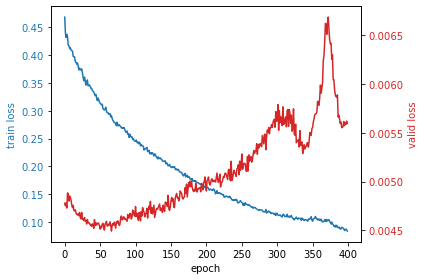

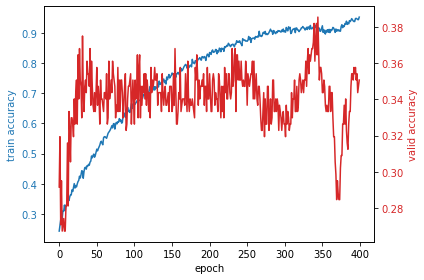

tensor([0, 1, 0, 0, 0, 0, 1, 3, 1, 3, 0, 2, 2, 2, 1, 2, 3, 2, 3, 0, 0, 3, 2, 3,
        1, 1, 1, 1, 2, 2, 1, 3, 0, 1, 0, 1, 0, 2, 0, 0, 3, 2, 0, 0, 3, 0, 0, 0,
        0, 1, 2, 0, 2, 1, 0, 3, 1, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2,
        2, 2, 0, 0, 2, 1, 1, 0, 1, 2, 2, 2, 0, 3, 2, 2, 1, 1, 0, 1, 3, 0, 3, 0,
        0, 1, 3, 1, 0, 3, 1, 3, 0, 2, 0, 3, 2, 1, 1, 0, 3, 2, 2, 2, 0, 3, 0, 2,
        0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 3, 1, 3, 3, 2, 0, 3, 1, 0, 1, 1, 0, 0, 1,
        3, 2, 1, 1, 1, 3, 1, 3, 0, 3, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1,
        2, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 2, 3, 0, 0, 2, 1, 2, 1, 2, 0, 0, 0,
        0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 1, 1, 0, 2, 0, 2, 2, 0, 1, 3, 3, 0, 2, 3,
        1, 1, 0, 1, 1, 2, 2, 0, 1, 3, 0, 0, 0, 3, 0, 1, 0, 3, 3, 0, 0, 0, 0, 0,
        0, 0, 2, 3, 2, 1, 0, 0, 1, 1, 3, 0, 1, 2, 2, 2, 2, 0, 0, 1, 1, 3, 2, 2,
        3, 0, 1, 1, 0, 0, 3, 2, 3, 0, 0, 1, 1, 1, 2, 3, 0, 2, 3, 0, 0, 3, 0, 2],
       device='cuda:0')


In [2]:
from importlib import reload
import utils
print(model.FC1)
reload(utils)
utils.plot_curve(loss_log, 'loss')
utils.plot_curve(accuracy_log, 'accuracy')
print(torch.argmax(model(test_dataset.data.to(device)), dim = 1))